<a href="https://colab.research.google.com/github/Ayesha-Feroz/Ayesha-Feroz/blob/main/Testing_for_delta_mass_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Manually entered list of true masses
true_masses = np.array([500.0, 1000.5, 1500.75, 2000.1])  # Modify this list as needed

# Load the experimental data
exp_masses = pd.read_csv("/content/res35noise0centroid_ms1.csv")  # Adjust path accordingly
exp_masses = exp_masses['MonoisotopicMass'].values

# Define mass shifts
mass_shifts = np.array([0, 1.00784, 15.99491, -0.984016])  # Example shifts

# Function to match masses
def match_masses(exp_mass, true_masses, mass_shifts, tolerance=0.01):
    possible_masses = true_masses.reshape(-1, 1) + mass_shifts
    differences = np.abs(possible_masses - exp_mass)
    min_diff = np.min(differences)
    return min_diff <= tolerance, min_diff

# Evaluate each experimental mass
results = []
for mass in exp_masses:
    is_true, delta = match_masses(mass, true_masses, mass_shifts)
    results.append((mass, is_true, delta))

# Visualization
results_df = pd.DataFrame(results, columns=['Experimental Mass', 'Is True Positive', 'Delta'])
true_positives = results_df[results_df['Is True Positive']]
false_positives = results_df[~results_df['Is True Positive']]

plt.figure(figsize=(10, 6))
plt.scatter(true_positives['Delta'], true_positives['Experimental Mass'], color='green', label='True Positives')
plt.scatter(false_positives['Delta'], false_positives['Experimental Mass'], color='red', label='False Positives')
plt.xlabel('Delta Mass')
plt.ylabel('Experimental Mass')
plt.legend()
plt.title('Mass Spectrometry Analysis')
plt.grid(True)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/res35noise0centroid_ms1.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ask user to input true masses
input_masses = input("Enter true masses separated by commas: ")
true_masses = np.array([float(mass.strip()) for mass in input_masses.split(',')])

# Load the experimental data
exp_masses = pd.read_csv("/content/res35noise0centroid_ms1.csv")  # Adjust path accordingly
exp_masses = exp_masses['MonoisotopicMass'].values

# Define mass shifts
mass_shifts = np.array([0, 1.00784, 15.99491, -0.984016])  # Example shifts

# Function to match masses
def match_masses(exp_mass, true_masses, mass_shifts, tolerance=0.01):
    possible_masses = true_masses.reshape(-1, 1) + mass_shifts
    differences = np.abs(possible_masses - exp_mass)
    min_diff = np.min(differences)
    return min_diff <= tolerance, min_diff

# Evaluate each experimental mass
results = []
for mass in exp_masses:
    is_true, delta = match_masses(mass, true_masses, mass_shifts)
    results.append((mass, is_true, delta))

# Visualization
results_df = pd.DataFrame(results, columns=['Experimental Mass', 'Is True Positive', 'Delta'])
true_positives = results_df[results_df['Is True Positive']]
false_positives = results_df[~results_df['Is True Positive']]

plt.figure(figsize=(10, 6))
plt.scatter(true_positives['Delta'], true_positives['Experimental Mass'], color='green', label='True Positives')
plt.scatter(false_positives['Delta'], false_positives['Experimental Mass'], color='red', label='False Positives')
plt.xlabel('Delta Mass')
plt.ylabel('Experimental Mass')
plt.legend()
plt.title('Mass Spectrometry Analysis')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("/content/res35noise0centroid_ms1.csv")
true_masses = np.array([500.0, 1000.5, 1500.75, 2000.1])  # Replace with your true masses

# Define mass shifts and tolerance
mass_shifts = np.array([0, 1.00784, 15.99491, -0.984016])  # Example shifts
tolerance = 0.1  # Adjust as needed

# Matching function
def match_masses(exp_mass, true_masses, mass_shifts, tolerance):
    possible_masses = true_masses.reshape(-1, 1) + mass_shifts
    differences = np.abs(possible_masses - exp_mass)
    min_diff = np.min(differences)
    closest_mass = possible_masses.flatten()[np.argmin(differences)]
    return (min_diff <= tolerance), min_diff, closest_mass - exp_mass

# Analyze data
data['Is True Positive'], data['Delta'], data['Delta Mass'] = zip(*data['MonoisotopicMass'].apply(
    lambda x: match_masses(x, true_masses, mass_shifts, tolerance)
))

# Plotting Monoisotopic Mass vs. Summed Intensity
plt.figure(figsize=(12, 6))
plt.scatter(data[data['Is True Positive']]['MonoisotopicMass'], data[data['Is True Positive']]['SumIntensity'], color='red', label='True Positive')
plt.scatter(data[~data['Is True Positive']]['MonoisotopicMass'], data[~data['Is True Positive']]['SumIntensity'], color='blue', label='False Positive')
plt.xlabel('Monoisotopic Mass')
plt.ylabel('Summed Intensity')
plt.title('Monoisotopic Mass vs. Summed Intensity')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Delta Mass vs. Intensity
plt.figure(figsize=(12, 6))
plt.scatter(data['Delta Mass'], data['SumIntensity'], color='gray', alpha=0.5)
plt.xlabel('Delta Mass')
plt.ylabel('Intensity')
plt.title('Delta Mass Modifications vs. Intensity')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("/content/res35noise0centroid_ms1.csv")
true_masses = np.array([500.0, 1000.5, 1500.75, 2000.1])  # Replace with your true masses

# Define mass shifts and tolerance
mass_shifts = np.array([0, 1.00784, 15.99491, -0.984016])  # Example shifts
tolerance = 0.1  # Adjust as needed

# Matching function
def match_masses(exp_mass, true_masses, mass_shifts, tolerance):
    possible_masses = true_masses.reshape(-1, 1) + mass_shifts
    differences = np.abs(possible_masses - exp_mass)
    min_diff = np.min(differences)
    closest_mass = possible_masses.flatten()[np.argmin(differences)]
    return (min_diff <= tolerance), min_diff, closest_mass - exp_mass

# Analyze data
data['Is True Positive'], data['Delta'], data['Delta Mass'] = zip(*data['MonoisotopicMass'].apply(
    lambda x: match_masses(x, true_masses, mass_shifts, tolerance)
))

# Plotting Monoisotopic Mass vs. Summed Intensity as Peaks
plt.figure(figsize=(12, 6))
for _, row in data.iterrows():
    color = 'red' if row['Is True Positive'] else 'blue'
    plt.vlines(row['MonoisotopicMass'], 0, row['SumIntensity'], colors=color, label='True Positive' if row['Is True Positive'] else 'False Positive', alpha=0.5)

plt.xlabel('Monoisotopic Mass')
plt.ylabel('Summed Intensity')
plt.title('Peak Plot: Monoisotopic Mass vs. Summed Intensity')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Delta Mass vs. Intensity as Peaks
plt.figure(figsize=(12, 6))
for _, row in data.iterrows():
    plt.vlines(row['Delta Mass'], 0, row['SumIntensity'], colors='gray', alpha=0.5)

plt.xlabel('Delta Mass')
plt.ylabel('Intensity')
plt.title('Peak Plot: Delta Mass Modifications vs. Intensity')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("/content/res35noise0centroid_ms1.csv")
true_masses = np.array(['9105.3, 11858.0, 21429.8, 28963.7, 50429.8, and 67959.4'])  # Replace with your true masses

# Define mass shifts and tolerance
mass_shifts = np.array([0, 1.00784, 15.99491, -0.984016])  # Example shifts
tolerance = 0.1  # Adjust as needed

# Matching function
def match_masses(exp_mass, true_masses, mass_shifts, tolerance):
    possible_masses = true_masses.reshape(-1, 1) + mass_shifts
    differences = np.abs(possible_masses - exp_mass)
    min_diff = np.min(differences)
    closest_mass = possible_masses.flatten()[np.argmin(differences)]
    return (min_diff <= tolerance), min_diff, closest_mass - exp_mass

# Analyze data
data['Is True Positive'], data['Delta'], data['Delta Mass'] = zip(*data['MonoisotopicMass'].apply(
    lambda x: match_masses(x, true_masses, mass_shifts, tolerance)
))

# Normalize intensities for visualization purposes
data['Normalized Intensity'] = data['SumIntensity'] / data['SumIntensity'].max() * 100

# Plotting Monoisotopic Mass vs. Summed Intensity as Peaks with controlled height
plt.figure(figsize=(12, 6))
for _, row in data.iterrows():
    color = 'red' if row['Is True Positive'] else 'blue'
    plt.vlines(row['MonoisotopicMass'], 0, row['Normalized Intensity'], colors=color, label='True Positive' if row['Is True Positive'] else 'False Positive', alpha=0.5)

plt.xlabel('Monoisotopic Mass')
plt.ylabel('Normalized Intensity')
plt.title('Normalized Peak Plot: Monoisotopic Mass vs. Summed Intensity')
plt.ylim(0, 120)  # Setting y-axis limit to a reasonable maximum
plt.legend()
plt.grid(True)
plt.show()

# Plotting Delta Mass vs. Normalized Intensity as Peaks
plt.figure(figsize=(12, 6))
for _, row in data.iterrows():
    plt.vlines(row['Delta Mass'], 0, row['Normalized Intensity'], colors='gray', alpha=0.5)

plt.xlabel('Delta Mass')
plt.ylabel('Normalized Intensity')
plt.title('Normalized Peak Plot: Delta Mass Modifications vs. Intensity')
plt.ylim(0, 120)  # Setting y-axis limit to a reasonable maximum
plt.grid(True)
plt.show()


In [ ]:
# The expected exact monoisotopic masses are 9,105.3, 11,858.0, 21,429.8, 28,963.7, 50,429.8, and 67,959.4 Da. The
# expected average masses are 9,111.5, 11,865.5, 21,442.6, 28,981.3, 50,459.7, and 68,001.2 Da
#79.966331
#modifications are  42.010565, -0.984016, 15.994915, 14.015650, 383.228103, -18.010565, -17.026549, 43.989829, 238.229666, 210.198366
541.061110, 204.187801, 28.990164, 272.250401, 27.994915, 0.984016, 94.967714, -131.040485, -89.029920

import pandas as pd
import numpy as np

def read_true_masses():
    """Prompts user to input six true protein masses."""
    true_masses = []
    for i in range(6):
        mass = float(input(f"Enter true mass {i+1}: "))
        true_masses.append(mass)
    return np.array(true_masses)

def read_modifications():
    """Prompts user to define modifications."""
    modifications = {}
    while True:
        mod = input("Enter modification name (or type 'done' to finish): ")
        if mod.lower() == 'done':
            break
        delta_mass = float(input(f"Enter delta mass for {mod}: "))
        modifications[mod] = delta_mass
    return modifications

def load_data(file_path):
    """Load the TSV file into a DataFrame."""
    return pd.read_csv(file_path, sep='\t')

def match_masses(data, true_masses, modifications, ppm_tolerance):
    """Matches experimental masses against true masses considering modifications."""
    results = []
    all_possible_masses = set(true_masses)
    mod_counts = {mod: 0 for mod in modifications}

    # Calculate possible true masses with modifications
    for mass in true_masses:
        for mod, delta_mass in modifications.items():
            mod_mass = mass + delta_mass
            all_possible_masses.add(mod_mass)

    # Matching process
    for index, row in data.iterrows():
        experimental_mass = row['MonoisotopicMass']
        target_type = row['TargetDecoyType']
        if target_type > 0:
            continue  # skip decoys

        min_diff = float('inf')
        closest_mass = None
        for true_mass in all_possible_masses:
            diff = abs(experimental_mass - true_mass)
            ppm = (diff / true_mass) * 1e6
            if ppm < ppm_tolerance and ppm < min_diff:
                min_diff = ppm
                closest_mass = true_mass

        is_true = min_diff < ppm_tolerance
        results.append((experimental_mass, is_true, closest_mass))

        if closest_mass in true_masses:
            for mod, delta_mass in modifications.items():
                if abs(closest_mass - (experimental_mass - delta_mass)) < (ppm_tolerance / 1e6) * experimental_mass:
                    mod_counts[mod] += 1

    # Validate modification occurrence
    valid_modifications = {mod: count for mod, count in mod_counts.items() if count > 2}

    # Update true positive status based on valid modifications
    for i, (exp_mass, is_true, closest_mass) in enumerate(results):
        if not is_true and closest_mass is not None:
            for mod in valid_modifications:
                if abs(closest_mass + modifications[mod] - exp_mass) < (ppm_tolerance / 1e6) * exp_mass:
                    results[i] = (exp_mass, True, closest_mass)

    return results, valid_modifications

def calculate_fdr(results):
    """Calculates the False Discovery Rate."""
    true_positives = sum(1 for _, is_true, _ in results if is_true)
    false_positives = len(results) - true_positives
    total_targets = len(results)
    fdr = (false_positives / total_targets) * 100 if total_targets else 0
    return fdr, true_positives, false_positives

# Main script execution
if __name__ == "__main__":
    true_masses = read_true_masses()
    modifications = read_modifications()
    file_path = input("Enter the path to your TSV file: ")
    ppm_tolerance = float(input("Enter the ppm tolerance for matching: "))

    data = load_data(file_path)
    results, valid_modifications = match_masses(data, true_masses, modifications, ppm_tolerance)
    fdr, tp, fp = calculate_fdr(results)

    print(f"True Positives: {tp}, False Positives: {fp}, FDR: {fdr}%")
    print("Valid modifications detected more than twice:", valid_modifications)


In [ ]:
import pandas as pd
import numpy as np

def load_data(file_path):
    """Load the TSV file into a DataFrame."""
    return pd.read_csv(file_path, sep='\t')

def match_masses(data, true_masses, modifications, ppm_tolerance):
    """Matches experimental masses against true masses considering modifications."""
    results = []
    all_possible_masses = set(true_masses)
    mod_counts = {mod: 0 for mod in modifications}

    # Calculate possible true masses with modifications
    for mass in true_masses:
        for mod, delta_mass in modifications.items():
            mod_mass = mass + delta_mass
            all_possible_masses.add(mod_mass)

    # Matching process
    for index, row in data.iterrows():
        experimental_mass = row['MonoisotopicMass']
        target_type = row['TargetDecoyType']
        if target_type > 0:
            continue  # skip decoys

        min_diff = float('inf')
        closest_mass = None
        for true_mass in all_possible_masses:
            diff = abs(experimental_mass - true_mass)
            ppm = (diff / true_mass) * 1e6
            if ppm < ppm_tolerance and ppm < min_diff:
                min_diff = ppm
                closest_mass = true_mass

        is_true = min_diff < ppm_tolerance
        results.append((experimental_mass, is_true, closest_mass))

        if closest_mass in true_masses:
            for mod, delta_mass in modifications.items():
                if abs(closest_mass - (experimental_mass - delta_mass)) < (ppm_tolerance / 1e6) * experimental_mass:
                    mod_counts[mod] += 1

    # Validate modification occurrence
    valid_modifications = {mod: count for mod, count in mod_counts.items() if count > 2}

    # Update true positive status based on valid modifications
    for i, (exp_mass, is_true, closest_mass) in enumerate(results):
        if not is_true and closest_mass is not None:
            for mod in valid_modifications:
                if abs(closest_mass + modifications[mod] - exp_mass) < (ppm_tolerance / 1e6) * exp_mass:
                    results[i] = (exp_mass, True, closest_mass)

    return results, valid_modifications

def calculate_fdr(results):
    """Calculates the False Discovery Rate."""
    true_positives = sum(1 for _, is_true, _ in results if is_true)
    false_positives = len(results) - true_positives
    total_targets = len(results)
    fdr = (false_positives / total_targets) * 100 if total_targets else 0
    return fdr, true_positives, false_positives

# Main script execution
if __name__ == "__main__":
    # Predefined true masses and modifications
    true_masses = np.array([9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4])
    modifications = np.array(['42.010565, -0.984016, 15.994915, 14.015650, 383.228103, -18.010565, -17.026549, 43.989829, 238.229666, 210.198366, 541.061110, 204.187801, 28.990164, 272.250401, 27.994915, 0.984016, 94.967714, -131.040485, -89.029920'])
    file_path = input("Enter the path to your TSV file: ")
    ppm_tolerance = float(input("Enter the ppm tolerance for matching: "))

    data = load_data(file_path)
    results, valid_modifications = match_masses(data, true_masses, modifications, ppm_tolerance)
    fdr, tp, fp = calculate_fdr(results)

    print(f"True Positives: {tp}, False Positives: {fp}, FDR: {fdr}%")
    print("Valid modifications detected more than twice:", valid_modifications)


In [ ]:
import pandas as pd
import numpy as np

# Function to load data from TSV file
def load_data(file_path):
    """Load the TSV file into a DataFrame."""
    return pd.read_csv(file_path, sep='\t')

# Function to match experimental masses with true masses and consider modifications
def match_masses(data, true_masses, modifications, ppm_tolerance):
    """Match experimental masses with true masses and consider modifications."""
    results = []
    all_possible_masses = set(true_masses)
    mod_counts = {mod: 0 for mod in modifications}

    # Calculate all possible true masses with given modifications
    for mass in true_masses:
        for mod, delta_mass in modifications.items():
            mod_mass = mass + delta_mass
            all_possible_masses.add(mod_mass)

    # Matching process
    for _, row in data.iterrows():
        experimental_mass = row['MonoisotopicMass']
        target_type = row['TargetDecoyType']

        if target_type > 0:
            continue  # Skip decoys

        min_diff = float('inf')
        closest_mass = None

        for true_mass in all_possible_masses:
            diff = abs(experimental_mass - true_mass)
            ppm = (diff / true_mass) * 1e6

            if ppm < ppm_tolerance and ppm < min_diff:
                min_diff = ppm
                closest_mass = true_mass

        is_true = min_diff < ppm_tolerance
        results.append((experimental_mass, is_true, closest_mass))

        if closest_mass in true_masses:
            for mod, delta_mass in modifications.items():
                if abs(closest_mass - (experimental_mass - delta_mass)) < (ppm_tolerance / 1e6) * experimental_mass:
                    mod_counts[mod] += 1

    # Validate modification occurrence
    valid_modifications = {mod: count for mod, count in mod_counts.items() if count > 1}

    # Update true positive status based on valid modifications
    for i, (exp_mass, is_true, closest_mass) in enumerate(results):
        if not is_true and closest_mass is not None:
            for mod in valid_modifications:
                if abs(closest_mass + modifications[mod] - exp_mass) < (ppm_tolerance / 1e6) * exp_mass:
                    results[i] = (exp_mass, True, closest_mass)

    return results, valid_modifications

# Function to calculate the False Discovery Rate (FDR)
def calculate_fdr(results):
    """Calculate the False Discovery Rate."""
    true_positives = sum(1 for _, is_true, _ in results if is_true)
    false_positives = len(results) - true_positives
    total_targets = len(results)

    fdr = (false_positives / total_targets) * 100 if total_targets else 0
    return fdr, true_positives, false_positives

# Main script execution
if __name__ == "__main__":
    # Predefined true masses and common modifications
    true_masses = np.array([9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4])

    # Converting modifications into a dictionary with keys as descriptions and values as delta masses
    modifications = {
        'Phospho': 79.966331,
        'Acetyl': 42.010565,
         'Amidated' : -0.984016,
         'Oxidation': 15.994915,
        'Methyl': 14.015650,
        #'LRGG': 383.228103,
        #'Glu->pyro-Glu': -18.010565,
        #'Gln->pyro-Glu': -17.026549,
        #'Carboxy': 43.989829,
        #'Palmitoyl': 238.229666,
        #'Myristoyl':  210.198366,
        #'ADP-Ribosyl' : 541.061110,
       # 'Farnesyl': 204.187801,
       # 'Nitrosyl': 28.990164,
        #'GeranylGeranyl': 272.250401,
        #'Formyl' : 27.994915,
        #'Deamidated': 0.984016,
         #'Sulfo+amino (Interim name)': 94.967714,
         #'Met-loss': -131.040485,
        #'Met-loss+Acetyl': -89.029920,
    }

    file_path = input("Enter the path to your TSV file: ")
    ppm_tolerance = float(input("Enter the ppm tolerance for matching: "))

    # Load the data
    data = load_data(file_path)

    # Get results and valid modifications
    results, valid_modifications = match_masses(data, true_masses, modifications, ppm_tolerance)

    # Calculate FDR
    fdr, tp, fp = calculate_fdr(results)

    # Display outcomes
    print(f"True Positives: {tp}, False Positives: {fp}, FDR: {fdr}%")
    print("Valid modifications detected more than twice:", valid_modifications)


In [ ]:
!pip install bokeh

In [ ]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import HoverTool

# Load data from TSV
file_path = "/content/20231207_NRTDP_Std_M5_C4_5cmCol_MRM_02_ms1.tsv"  # replace with your actual file path
data = pd.read_csv(file_path, sep='\t')

# Filter the data to include only rows with TargetDecoyType = 0
filtered_data = data[data['TargetDecoyType'] == 0]

# Sort by MonoisotopicMass to ensure proper plotting order
filtered_data = filtered_data.sort_values(by='MonoisotopicMass')

# Set up Bokeh
output_notebook()

# Create a figure with appropriate labels and hover tools
p = figure(
    title="Mass Spectrum Peaks",
    x_axis_label="MonoisotopicMass",
    y_axis_label="SumIntensity",
    width=800,
    height=600,
    tools="pan,wheel_zoom,box_zoom,reset,save"
)

# Add a scatter plot to represent peaks
p.circle(
    x=filtered_data['MonoisotopicMass'],
    y=filtered_data['SumIntensity'],
    size=6,
    color="blue",
    alpha=0.6,
    legend_label="Peaks"
)

# Add hover functionality to show detailed information on hover
hover = HoverTool(
    tooltips=[
        ("MonoisotopicMass", "@x"),
        ("SumIntensity", "@y"),
    ]
)

p.add_tools(hover)

# Show the plot
show(p)


In [ ]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import HoverTool

# Load data from TSV
file_path = "/content/20231207_NRTDP_Std_M5_C4_5cmCol_MRM_02_ms1.tsv"  # replace with your actual file path
data = pd.read_csv(file_path, sep='\t')

# Filter the data to include only rows with TargetDecoyType = 0
filtered_data = data[data['TargetDecoyType'] == 0]

# Set up Bokeh
output_notebook()  # to display the plot in a Jupyter Notebook

# Create a figure with appropriate labels
p = figure(
    title="Interactive Mass Spectrum",
    x_axis_label="MonoisotopicMass",
    y_axis_label="SumIntensity",
    width=800,
    height=600,
    tools="pan,wheel_zoom,box_zoom,reset,save"
)

# Add a scatter plot for MonoisotopicMass vs. SumIntensity
p.scatter(
    x=filtered_data['MonoisotopicMass'],
    y=filtered_data['SumIntensity'],
    size=5,
    color="blue",
    alpha=0.5,
    legend_label="Spectrum"
)

# Add hover functionality to display data on hover
hover = HoverTool(
    tooltips=[
        ("MonoisotopicMass", "@x"),
        ("SumIntensity", "@y"),
    ]
)

p.add_tools(hover)

# Show the plot
show(p)

In [ ]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import HoverTool
import pandas as pd

# Load data from TSV
file_path = "/content/Experimental deconvolved file.tsv"  # Replace with your actual file path
data = pd.read_csv(file_path, sep='\t')

# Filter the data to include only rows with TargetDecoyType = 0
filtered_data = data[data['TargetDecoyType'] == 0]

# Sort the data by MonoisotopicMass
filtered_data = filtered_data.sort_values('MonoisotopicMass')

# Set up Bokeh
output_notebook()  # to display the plot in a Jupyter Notebook

# Create a figure with appropriate labels and a logarithmic y-axis if needed
p = figure(
    title="Peptide Fragmentation Mass Spectrum",
    x_axis_label="MonoisotopicMass)",
    y_axis_label="Intensity",
    width=1024,
    height=768,
    tools="pan,wheel_zoom,box_zoom,reset,save",
    #y_axis_type="log"  # Uncomment this line if a log scale is needed
)

# Add a line plot for Mass vs. Intensity
p.line(
    x=filtered_data['MonoisotopicMass'],
    y=filtered_data['SumIntensity'],
    line_width=2,
    color="blue",
    alpha=0.7,
    legend_label="Spectrum"
)

# Add hover functionality to display data on hover
hover = HoverTool(
    tooltips=[
        ("m/z", "@x"),
        ("Intensity", "@y"),
    ]
)

p.add_tools(hover)

# Show the plot
show(p)


In [ ]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import HoverTool

# Function to load data from TSV file
def load_data(file_path):
    """Load the TSV file into a DataFrame."""
    return pd.read_csv(file_path, sep='\t')

# Function to match experimental masses with true masses and consider modifications
def match_masses(data, true_masses, modifications, ppm_tolerance):
    """Match experimental masses with true masses and consider modifications."""
    results = []
    all_possible_masses = set(true_masses)
    mod_counts = {mod: 0 for mod in modifications}

    # Calculate all possible true masses with given modifications
    for mass in true_masses:
        for mod, delta_mass in modifications.items():
            mod_mass = mass + delta_mass
            all_possible_masses.add(mod_mass)

    # Matching process
    for _, row in data.iterrows():
        experimental_mass = row['MonoisotopicMass']
        target_type = row['TargetDecoyType']

        if target_type > 0:
            continue  # Skip decoys

        min_diff = float('inf')
        closest_mass = None

        for true_mass in all_possible_masses:
            diff = abs(experimental_mass - true_mass)
            ppm = (diff / true_mass) * 1e6

            if ppm < ppm_tolerance and ppm < min_diff:
                min_diff = ppm
                closest_mass = true_mass

        is_true = min_diff < ppm_tolerance
        results.append((experimental_mass, is_true, closest_mass))

        if closest_mass in true_masses:
            for mod, delta_mass in modifications.items():
                if abs(closest_mass - (experimental_mass - delta_mass)) < (ppm_tolerance / 1e6) * experimental_mass:
                    mod_counts[mod] += 1

    # Validate modification occurrence
    valid_modifications = {mod: count for mod, count in mod_counts.items() if count > 1}

    # Update true positive status based on valid modifications
    for i, (exp_mass, is_true, closest_mass) in enumerate(results):
        if not is_true and closest_mass is not None:
            for mod in valid_modifications:
                if abs(closest_mass + modifications[mod] - exp_mass) < (ppm_tolerance / 1e6) * exp_mass:
                    results[i] = (exp_mass, True, closest_mass)

    return results, valid_modifications

# Function to calculate the False Discovery Rate (FDR)
def calculate_fdr(results):
    """Calculate the False Discovery Rate."""
    true_positives = sum(1 for _, is_true, _ in results if is_true)
    false_positives = len(results) - true_positives
    total_targets = len(results)

    fdr = (false_positives / total_targets) * 100 if total_targets else 0
    return fdr, true_positives, false_positives

# Predefined true masses and common modifications
true_masses = np.array([9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4])

modifications = {
    'Phospho': 79.966331,
        'Acetyl': 42.010565,
         'Amidated' : -0.984016,
         'Oxidation': 15.994915,
        'Methyl': 14.015650,
        'LRGG': 383.228103,
        'Glu->pyro-Glu': -18.010565,
        'Gln->pyro-Glu': -17.026549,
        'Carboxy': 43.989829,
        'Palmitoyl': 238.229666,
        'Myristoyl':  210.198366,
        'ADP-Ribosyl' : 541.061110,
       'Farnesyl': 204.187801,
       'Nitrosyl': 28.990164,
        'GeranylGeranyl': 272.250401,
        'Formyl' : 27.994915,
        'Deamidated': 0.984016,
         'Sulfo+amino (Interim name)': 94.967714,
         'Met-loss': -131.040485,
        'Met-loss+Acetyl': -89.029920,
}

# User input for the file path and tolerances
file_path = "/content/Experimental deconvolved file.tsv" # Replace with your actual file path or use input() in interactive environments
ppm_tolerance = 20.0  # Replace with your actual ppm tolerance or use input()
Qvalue_threshold = 0.05  # Replace with your actual Q-value threshold or use input()

# Load the data
data = load_data(file_path)

# Get results and valid modifications
results, valid_modifications = match_masses(data, true_masses, modifications, ppm_tolerance)

# Filter the results based on Q-value threshold
matched_peaks = [r for r in results if r[1]]
unmatched_peaks = [r for r in results if not r[1]]

# Extract m/z and intensity for matched and unmatched peaks
matched_mz = [r[0] for r in matched_peaks]
matched_intensity = [data[data['MonoisotopicMass'] == mz]['SumIntensity'].iloc[0] for mz in matched_mz]

unmatched_mz = [r[0] for r in unmatched_peaks]
unmatched_intensity = [data[data['MonoisotopicMass'] == mz]['SumIntensity'].iloc[0] for mz in unmatched_mz]

# Calculate FDR
fdr, tp, fp = calculate_fdr(results)
print(f"True Positives: {tp}, False Positives: {fp}, FDR: {fdr}%")
print("Valid modifications detected more than twice:", valid_modifications)

# Set up Bokeh
output_notebook()

# Create a figure with appropriate labels
p = figure(
    title="Peptide Fragmentation Mass Spectrum",
    x_axis_label="m/z (mass-to-charge ratio)",
    y_axis_label="Intensity",
    width=1024,
    height=768,
    tools="pan,wheel_zoom,box_zoom,reset,save"
)

# Add the matched and unmatched peaks to the plot
p.circle(matched_mz, matched_intensity, size=5, color="green", alpha=0.5, legend_label="Matched Peaks")
p.circle(unmatched_mz, unmatched_intensity, size=5, color="red", alpha=0.5, legend_label="Unmatched Peaks")

# Add hover functionality to display data on hover
hover = HoverTool(
    tooltips=[
        ("m/z", "@x"),
        ("Intensity", "@y"),
    ]
)

p.add_tools(hover)
show(p)


True Positives: 431, False Positives: 3420, FDR: 88.8081017917424%
Valid modifications detected more than twice: {'Amidated': 9, 'Deamidated': 10}


In [ ]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import HoverTool

# Assuming the .tsv file is in the correct path, load the data
file_path = '/content/190507_Thermo_Std_FD2_ms1.tsv'  # Replace with your actual file path

# Read the TSV file into a pandas DataFrame
data = pd.read_csv(file_path, sep='\t')

# Sort the data by MonoisotopicMass to ensure correct plotting
data_sorted = data.sort_values(by='MonoisotopicMass')

# Specific masses to be highlighted in the spectrum
specific_masses = [9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4]

# Set up the output to display the plot within the Jupyter Notebook
output_notebook()

# Create a Bokeh figure with appropriate title and labels
p = figure(title="Peptide Fragmentation Mass Spectrum",
           x_axis_label='MonosiotopicMass',
           y_axis_label='Intensity')

# Add a hover tool that will show the m/z and intensity on hover
hover = HoverTool(tooltips=[("m/z", "@x"), ("Intensity", "@y")])
p.add_tools(hover)

# Plot the entire spectrum as individual points
p.scatter(data_sorted['MonoisotopicMass'], data_sorted['SumIntensity'], marker="circle", size=3, color="blue")

# Highlight specific masses with circles
for mass in specific_masses:
    peak_data = data_sorted[(data_sorted['MonoisotopicMass'] >= mass - 1) & (data_sorted['MonoisotopicMass'] <= mass + 1)]
    p.circle(peak_data['MonoisotopicMass'], peak_data['SumIntensity'], size=6, color="red", legend_label="Selected Peaks")

# Show the plot
show(p)


In [ ]:
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, HoverTool, NumeralTickFormatter, Label
from bokeh.palettes import Category10

df = pd.read_csv('/content/Experimental deconvolved file.tsv', sep='\t')
output_notebook()
cds = ColumnDataSource(data=df)

def create_p(width=800, height=300,
            main_title='Peptide Fragmentation Mass Spectrum'):
    tooltips = [
        ('m/z','@MonoisotopicMass{0.0000}'),
        ('Int','@SumIntensity')
        ]
    p = figure(
        width=width, height=height,
        title = main_title,
        tools = 'xwheel_zoom,xpan,box_zoom,undo,reset',
        tooltips=tooltips
        )
    return p
p = create_p()

p.vbar(
    x = 'MonoisotopicMass', top = 'SumIntensity',
    source = cds,
    color = '#324ea8',# alpha = 0.8,
    width = 0.001
    )
show(p)

In [ ]:
#Triplicate the points on the m/z axis
mzTransformed = [ (x, x, x) for x in df['MonoisotopicMass'] ]
#Flatten the list of tuples for the m/z axis
mzTransformed = [ x for y in mzTransformed for x in y ]
#Create the vertical bars for each intensity value
intensTransformed = [ (0, x, 0) for x in df['SumIntensity'] ]
#Flatten the list of tuples for the intensity axis
intensTransformed = [ x for y in intensTransformed for x in y ]
df2 = pd.DataFrame(
    { 'mz': mzTransformed, 'Intensity': intensTransformed }
)
df2.head(7)

mz  Intensity
0  502.099235        0.0
1  502.099235    21499.1
2  502.099235        0.0
3  504.090296        0.0
4  504.090296    11484.8
5  504.090296        0.0
6  510.464152        0.0

In [ ]:
# Install required packages
!pip install pandas pyopenms


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.9/52.9 MB 4.9 MB/s eta 0:00:00


In [ ]:
pip install --upgrade bokeh


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/20231208_ECR_NTDP_Pierce_Intact_1ul_3xDil_60min_TOFMS_07_ms1.tsv"  # Adjust with the correct path
data = pd.read_csv(file_path, sep='\t')

# Define true masses and common modifications
true_masses = np.array([9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4])
modifications = {
    "Oxidation": 15.9949,
    "Acetylation": 42.0106,
    "Phospho": 79.966331,
        "Acetyl": 42.010565,
         "Amidated" : -0.984016,
        "Methyl": 14.015650,
        "LRGG": 383.228103,
        "Glu->pyro-Glu": -18.010565,
        "Gln->pyro-Glu": -17.026549,
        "Carboxy": 43.989829,
        "Palmitoyl": 238.229666,
        "Myristoyl":  210.198366,
        "ADP-Ribosyl" : 541.061110,
       "Farnesyl": 204.187801,
       "Nitrosyl": 28.990164,
        "GeranylGeranyl": 272.250401,
        "Formyl": 27.994915,
        "Deamidated": 0.984016,
         "Sulfo+amino (Interim name)": 94.967714,
         "Met-loss": -131.040485,
        "Met-loss+Acetyl": -89.029920,
    # Add other modifications if needed
}

ppm_tolerance = 10  # Parts per million tolerance

# Calculate PPM difference
def ppm_difference(detected_mass, true_mass):
    return np.abs(detected_mass - true_mass) / true_mass * 1e6

# Identify true positives
def is_true_positive(experimental_mass, true_masses, modifications, ppm_tolerance):
    # Check direct match within ppm tolerance
    for true_mass in true_masses:
        if ppm_difference(experimental_mass, true_mass) <= ppm_tolerance:
            return True
    # Check matches with allowed modifications
    for mod_name, delta_mass in modifications.items():
        for true_mass in true_masses:
            modified_mass = true_mass + delta_mass
            if ppm_difference(experimental_mass, modified_mass) <= ppm_tolerance:
                return True
    return False

# Add a column for True Positives
data['is_true_positive'] = data.apply(
    lambda row: is_true_positive(row['MonoisotopicMass'], true_masses, modifications, ppm_tolerance), axis=1
)

# Filter for TargetDecoyType = 0 and Qvalue <= 0.05
filtered_targets = data[(data['TargetDecoyType'] == 0) & (data['Qvalue'] <= 0.05)]

# Identify true positives and false positives
true_positives = filtered_targets[filtered_targets['is_true_positive']]
false_positives = filtered_targets[~filtered_targets['is_true_positive']]
decoys = data[data['TargetDecoyType'] > 0]

# Display results
print(f"Total Targets: {len(filtered_targets)}")
print(f"True Positives: {len(true_positives)}")
print(f"False Positives: {len(false_positives)}")

# Optional: Show first few rows of true positives and false positives
print("True Positives:")
print(true_positives.head())
print("False Positives:")
print(false_positives.head())
# Total positives is the sum of true and false positives
total_positives = true_positives + false_positives

# Calculate FDR
fdr = false_positives / total_positives  # Convert to proportion
fdr_percent = fdr * 100  # Convert to percentage

print("False Discovery Rate (FDR): {:.2f}%".format(fdr_percent))

# Plot distributions
#plt.figure(figsize=(10, 6))

# Plot target distribution
#sns.histplot(true_positives['MonoisotopicMass'], kde=True, color='blue', label='Targets')

# Plot decoy distribution
#sns.histplot(decoys['MonoisotopicMass'], kde=True, color='red', label='Decoys')

# Configure plot
#plt.title('Distribution of MonoisotopicMass for Targets and Decoys')
#plt.xlabel('MonoisotopicMass')
#plt.ylabel('Density')
#plt.legend()
#plt.grid(True)
#plt.show()


Total Targets: 125649
True Positives: 21622
False Positives: 104027
True Positives:
       Index                                           FileName    ScanNum  \
86490  86491  /Users/kyowonjeong/Data/mzml/rick/20231208_ECR...  6269001.0   
86582  86583  /Users/kyowonjeong/Data/mzml/rick/20231208_ECR...  6271001.0   
86654  86655  /Users/kyowonjeong/Data/mzml/rick/20231208_ECR...  6273001.0   
86693  86694  /Users/kyowonjeong/Data/mzml/rick/20231208_ECR...  6274001.0   
86829  86830  /Users/kyowonjeong/Data/mzml/rick/20231208_ECR...  6277001.0   

       FeatureIndex  TargetDecoyType  RetentionTime  MassCountInSpec  \
86490          52.0              0.0        793.836             48.0   
86582          52.0              0.0        794.089             43.0   
86654          52.0              0.0        794.343             36.0   
86693          52.0              0.0        794.469             39.0   
86829          52.0              0.0        794.849             45.0   

        Averag

TypeError: unsupported format string passed to DataFrame.__format__

In [ ]:
import numpy as np
import pandas as pd

# Load the data
file_path = "/content/190507_Thermo_Std_FD2_ms1.tsv"
ms1_data = pd.read_csv(file_path, sep='\t')

# Check if 'MonoisotopicMass' column exists
if 'MonoisotopicMass' not in ms1_data.columns:
    raise ValueError("The required column 'MonoisotopicMass' is missing from the data")

# Define true masses and mass tolerance
true_masses = np.array([9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4])
mass_tolerance_ppm = 10

# Calculate allowable delta mass for each true mass
allowable_delta_mass = true_masses * (mass_tolerance_ppm / 1_000_000)

# Extract the observed masses from the dataset
observed_masses = ms1_data['MonoisotopicMass'].values

# Initialize lists to classify observed masses as true or false positives
true_positives = []
false_positives = []

# Check each observed mass against each true mass within the allowable delta
for observed_mass in observed_masses:
    is_true_positive = False
    for i, true_mass in enumerate(true_masses):
        delta_mass = abs(observed_mass - true_mass)
        if delta_mass <= allowable_delta_mass[i]:
            is_true_positive = True
            true_positives.append(observed_mass)
            break
    if not is_true_positive:
        false_positives.append(observed_mass)

# Calculate the number of true and false positives
num_true_positives = len(true_positives)
num_false_positives = len(false_positives)

# Calculate FDR
total_positives = num_true_positives + num_false_positives
fdr = (num_false_positives / total_positives) * 100 if total_positives > 0 else 0

print(f"Number of True Positives: {num_true_positives}")
print(f"Number of False Positives: {num_false_positives}")
print(f"False Discovery Rate (FDR): {fdr}%")


In [ ]:
import pandas as pd
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Category10

# Load the dataset
df = pd.read_csv('/content/Experimental deconvolved file.tsv', sep='\t')

# Filter the dataset to include only those entries where TargetDecoyType = 0 and Qvalue <= 0.05
filtered_df = df[(df['TargetDecoyType'] == 0) & (df['Qvalue'] <= 0.05)]

# Configure Bokeh to display plots in the notebook
output_notebook()

# Create a ColumnDataSource from the filtered DataFrame
cds = ColumnDataSource(data=filtered_df)

def create_p(width=800, height=300, main_title='MS1 deconvolved dataset from FD'):
    tooltips = [
        ('m/z', '@MonoisotopicMass{0.0000}'),  # Display the mass with 4 decimal places
        ('Int', '@SumIntensity')               # Display the intensity
    ]
    p = figure(
        width=width, height=height,
        title=main_title,
        tools='xwheel_zoom,xpan,box_zoom,undo,reset',
        tooltips=tooltips
    )
    return p

# Create the plot
p = create_p()

# Add a vertical bar plot to the figure
p.vbar(
    x='MonoisotopicMass', top='SumIntensity',
    source=cds,
    color='#324ea8',
    width=0.001  # Set the width of the bars
)

# Show the plot
show(p)


In [ ]:
import pandas as pd
import numpy as np
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import gridplot

# Load the dataset
df = pd.read_csv('/content/Experimental deconvolved file.tsv', sep='\t')

# Filter the dataset to include only those entries where TargetDecoyType = 0 and Qvalue <= 0.05
filtered_df = df[(df['TargetDecoyType'] == 0) & (df['Qvalue'] <= 0.1)]

# Define true masses
true_masses = np.array([9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4])

# Function to find nearest intensity for a given mass
def find_nearest_intensity(mass, dataframe, width=10):
    # Find the subset of dataframe where mass is within a certain window
    mass_window = dataframe[(dataframe['MonoisotopicMass'] >= mass - width) & (dataframe['MonoisotopicMass'] <= mass + width)]
    if not mass_window.empty:
        # Return the highest intensity in this window
        return mass_window.loc[mass_window['SumIntensity'].idxmax()]['SumIntensity']
    return None

# Add markers for true masses
true_mass_markers = {'mass': [], 'intensity': []}
for mass in true_masses:
    intensity = find_nearest_intensity(mass, filtered_df)
    if intensity:
        true_mass_markers['mass'].append(mass)
        true_mass_markers['intensity'].append(intensity)

# Convert markers to ColumnDataSource
true_mass_cds = ColumnDataSource(data=true_mass_markers)

# Configure Bokeh to display plots in the notebook
output_notebook()

# Create a ColumnDataSource from the filtered DataFrame
cds = ColumnDataSource(data=filtered_df)

def create_p(width=800, height=300, main_title='PIP Dataset'):
    tooltips = [
        ('m/z', '@MonoisotopicMass{0.0000}'),
        ('Int', '@SumIntensity')
    ]
    p = figure(
        width=width, height=height,
        title=main_title,
        tools='xwheel_zoom,xpan,box_zoom,undo,reset',
        tooltips=tooltips
    )
    return p

# Create the plot
p = create_p()

# Add a vertical bar plot to the figure
p.vbar(
    x='MonoisotopicMass', top='SumIntensity',
    source=cds,
    color='#324ea8',
    width=0.001  # Set the width of the bars
)

# Add red dots for true masses
p.circle(
    x='mass', y='intensity',
    source=true_mass_cds,
    size=10,
    color='red',
    legend_label='True Masses'
)

# Show the plot
show(p)


In [ ]:
pip install jupyter_bokeh

In [ ]:
import pandas as pd
import numpy as np
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool, LabelSet
from bokeh.layouts import gridplot

# Load the dataset
df = pd.read_csv('/content/Experimental deconvolved file.tsv', sep='\t')

# Filter the dataset to include only those entries where TargetDecoyType = 0 and Qvalue <= 0.05
filtered_df = df[(df['TargetDecoyType'] == 0) & (df['Qvalue'] <= 0.5)]

# Define true masses
true_masses = np.array([9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4])

# Function to find nearest intensity for a given mass
def find_nearest_intensity(mass, dataframe, width=10):
    # Find the subset of dataframe where mass is within a certain window
    mass_window = dataframe[(dataframe['MonoisotopicMass'] >= mass - width) & (dataframe['MonoisotopicMass'] <= mass + width)]
    if not mass_window.empty:
        # Return the highest intensity in this window
        return mass_window.loc[mass_window['SumIntensity'].idxmax()]['SumIntensity']
    return None

# Add markers for true masses
true_mass_markers = {'mass': [], 'intensity': [], 'label': []}
for mass in true_masses:
    intensity = find_nearest_intensity(mass, filtered_df)
    if intensity:
        true_mass_markers['mass'].append(mass)
        true_mass_markers['intensity'].append(intensity)
        true_mass_markers['label'].append(f'{mass:.4f}')

# Convert markers to ColumnDataSource
true_mass_cds = ColumnDataSource(data=true_mass_markers)

# Configure Bokeh to display plots in the notebook
output_notebook()

# Create a ColumnDataSource from the filtered DataFrame
cds = ColumnDataSource(data=filtered_df)

def create_p(width=800, height=300, main_title='Deconvolved PIP data set from FD'):
    tooltips = [
        ('m/z', '@MonoisotopicMass{0.0000}'),
        ('Int', '@SumIntensity')
    ]
    p = figure(
        width=width, height=height,
        title=main_title,
        tools='xwheel_zoom,xpan,box_zoom,undo,reset',
        tooltips=tooltips
    )
    return p

# Create the plot
p = create_p()

# Add a vertical bar plot to the figure
p.vbar(
    x='MonoisotopicMass', top='SumIntensity',
    source=cds,
    color='#324ea8',
    width=0.001  # Set the width of the bars
)

# Add red dots for true masses
p.circle(
    x='mass', y='intensity',
    source=true_mass_cds,
    size=10,
    color='red',
    #legend_label='True Masses'
)

# Add labels above red dots
labels = LabelSet(x='mass', y='intensity', text='label', level='glyph',
                  x_offset=0, y_offset=3, source=true_mass_cds,
                  text_font_size="8pt", text_color="black")
p.add_layout(labels)

# Show the plot
show(p)


In [ ]:
import pandas as pd
import numpy as np
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import gridplot

# Load the dataset
df = pd.read_csv('/content/Experimental deconvolved file.tsv', sep='\t')

# Filter the dataset to include only those entries where TargetDecoyType = 0 and Qvalue <= 0.05
filtered_df = df[(df['TargetDecoyType'] == 0) & (df['Qvalue'] <= 0.05)]

# Define true masses
true_masses = np.array([9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4])

# Function to find nearest intensity for a given mass
def find_nearest_intensity(mass, dataframe, width=10):
    # Find the subset of dataframe where mass is within a certain window
    mass_window = dataframe[(dataframe['MonoisotopicMass'] >= mass - width) & (dataframe['MonoisotopicMass'] <= mass + width)]
    if not mass_window.empty:
        # Return the highest intensity in this window
        return mass_window.loc[mass_window['SumIntensity'].idxmax()]['SumIntensity']
    return None

# Add markers for true masses
true_mass_markers = {'mass': [], 'intensity': []}
for mass in true_masses:
    intensity = find_nearest_intensity(mass, filtered_df)
    if intensity:
        true_mass_markers['mass'].append(mass)
        true_mass_markers['intensity'].append(intensity)

# Convert markers to ColumnDataSource
true_mass_cds = ColumnDataSource(data=true_mass_markers)

# Configure Bokeh to display plots in the notebook
output_notebook()

# Create a ColumnDataSource from the filtered DataFrame
cds = ColumnDataSource(data=filtered_df)

def create_p(width=800, height=300, main_title='Deconvolved PIP dataset from FD'):
    tooltips = [
        ('m/z', '@MonoisotopicMass{0.0000}'),
        ('Int', '@SumIntensity')
    ]
    p = figure(
        width=width, height=height,
        title=main_title,
        tools='xwheel_zoom,xpan,box_zoom,undo,reset',
        tooltips=tooltips
    )
    return p

# Create the plot
p = create_p()

# Add a vertical bar plot to the figure
p.vbar(
    x='MonoisotopicMass', top='SumIntensity',
    source=cds,
    color='#324ea8',
    width=0.001  # Set the width of the bars
)

# Add red dots for true masses
p.circle(
    x='mass', y='intensity',
    source=true_mass_cds,
    size=10,
    color='red',
    legend_label='True Masses'
)

# Show the plot
show(p)


IndexError: index 599 is out of bounds for axis 0 with size 599

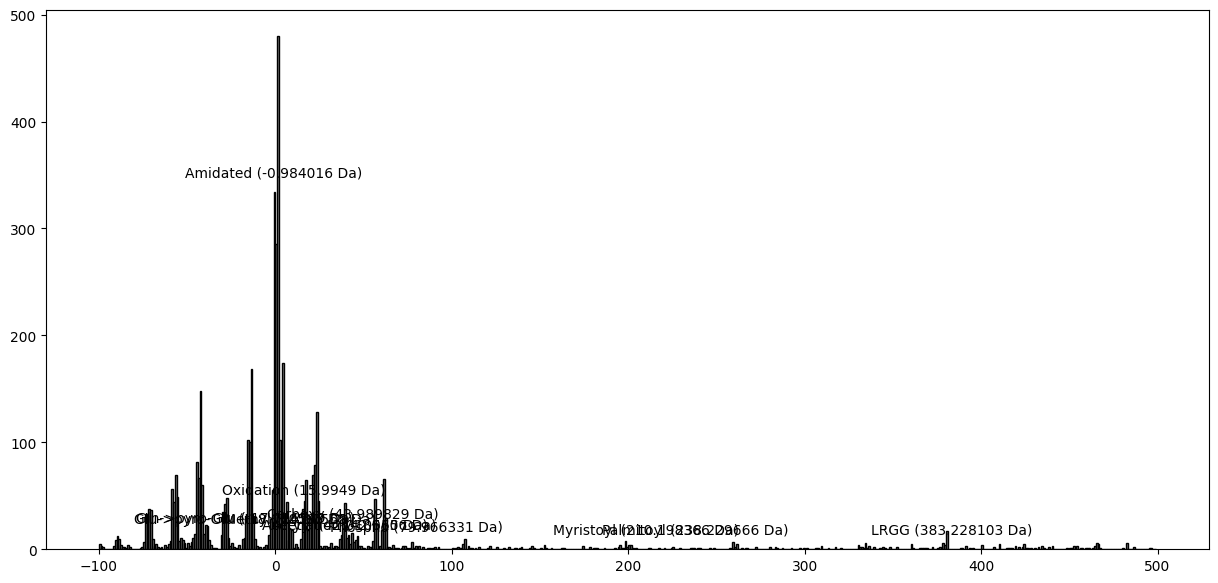

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/190507_Thermo_Std_FD2_ms1.tsv', sep='\t')

# Define true masses
true_masses = np.array([9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4])

# This placeholder assumes your dataset has a column 'Observed Mass' or similar
# If not, replace 'Observed Mass' with the appropriate column name
observed_masses = df['MonoisotopicMass'].values

# Calculate the closest delta mass for each observed mass
delta_masses = np.concatenate([observed_masses - mass for mass in true_masses])

# Define bins for the histogram, focusing around common PTM delta masses
bins = np.arange(-100, 500, 1)  # Adjust this range and bin width as necessary

# Plotting the histogram
plt.figure(figsize=(15, 7))
counts, _, patches = plt.hist(delta_masses, bins=bins, color='gray', edgecolor='black')

# Annotate specific PTMs, these should be known delta masses of interest
ptms = {
  "Oxidation": 15.9949,
    "Acetylation": 42.0106,
    "Phospho": 79.966331,
    "Acetyl": 42.010565,
    "Amidated": -0.984016,
    "Methyl": 14.015650,
    "LRGG": 383.228103,
    "Glu->pyro-Glu": -18.010565,
    "Gln->pyro-Glu": -17.026549,
    "Carboxy": 43.989829,
    "Palmitoyl": 238.229666,
    "Myristoyl": 210.198366,
    "ADP-Ribosyl": 541.061110,
    "Farnesyl": 204.187801,
    "Nitrosyl": 28.990164,
    "GeranylGeranyl": 272.250401,
    "Formyl": 27.994915,
    "Deamidated": 0.984016,
    "Sulfo+amino": 94.967714,
    "Met-loss": -131.040485,
    "Met-loss+Acetyl": -89.029920
}

# Adding annotations for the PTMs
for ptm, mass in ptms.items():
    plt.annotate(f'{ptm} ({mass} Da)', xy=(mass, counts[np.digitize(mass, bins) - 1] + 5),
                 xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

# Labeling the plot
plt.title('Histogram of Mass Shifts Relative to True Masses with PTM Annotations')
plt.xlabel('Delta Mass (Da)')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Category20_20
from bokeh.transform import factor_cmap

# Load the dataset
df = pd.read_csv('/content/Experimental deconvolved file.tsv', sep='\t')

# Filter the dataset to include only those entries where TargetDecoyType = 0 and Qvalue <= 0.05
filtered_df = df[(df['TargetDecoyType'] == 0) & (df['Qvalue'] <= 0.1)]

# Define true masses
true_masses = np.array([9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4])

# Define the PTMs and their masses
ptms = {
    "Oxidation": 15.9949,
    "Acetylation": 42.0106,
    "Phospho": 79.966331,
    "Acetyl": 42.010565,
    "Amidated": -0.984016,
    "Methyl": 14.015650,
    "LRGG": 383.228103,
    "Glu->pyro-Glu": -18.010565,
    "Gln->pyro-Glu": -17.026549,
    "Carboxy": 43.989829,
    "Palmitoyl": 238.229666,
    "Myristoyl": 210.198366,
    "ADP-Ribosyl": 541.061110,
    "Farnesyl": 204.187801,
    "Nitrosyl": 28.990164,
    "GeranylGeranyl": 272.250401,
    "Formyl": 27.994915,
    "Deamidated": 0.984016,
    "Sulfo+amino": 94.967714,
    "Met-loss": -131.040485,
    "Met-loss+Acetyl": -89.029920
}

# Function to find nearest intensity for a given mass
def find_nearest_intensity(mass, dataframe, width=10):
    mass_window = dataframe[(dataframe['MonoisotopicMass'] >= mass - width) & (dataframe['MonoisotopicMass'] <= mass + width)]
    if not mass_window.empty:
        return mass_window.loc[mass_window['SumIntensity'].idxmax()]['SumIntensity']
    return 0

# Calculate modified masses for each true mass with each PTM
modified_masses = []
colors = []
labels = []
for mass in true_masses:
    for ptm, delta_mass in ptms.items():
        mod_mass = mass + delta_mass
        intensity = find_nearest_intensity(mod_mass, filtered_df, width=10)
        if intensity > 0:
            modified_masses.append((mod_mass, intensity))
            colors.append(ptm)
            labels.append(f"{ptm} (+{delta_mass})")

# Create a ColumnDataSource for the modified masses
source = ColumnDataSource(data=dict(x=[m[0] for m in modified_masses], y=[m[1] for m in modified_masses], color=colors, label=labels))

# Configure Bokeh to display plots in the notebook
output_notebook()

# Create the plot
p = figure(width=800, height=300, title='PTM ',
           tools='xwheel_zoom,xpan,box_zoom,undo,reset', tooltips="@label: @x{0.0000} Da")

# Add a vertical bar plot to the figure for each PTM
p.circle('x', 'y', size=8, source=source,
         color=factor_cmap('color', palette=Category20_20, factors=colors), legend_field='color')

# Configure plot aesthetics
p.legend.title = 'PTM Type'
p.legend.location = 'top_right'
p.xaxis.axis_label = "Mass/Da"
p.yaxis.axis_label = "Intensity"

# Show the plot
show(p)


In [ ]:
import pandas as pd
import numpy as np
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Category20_20
from bokeh.transform import factor_cmap

# Load the dataset
df = pd.read_csv('/content/Experimental deconvolved file.tsv', sep='\t')

# Filter the dataset to include only those entries where TargetDecoyType = 0 and Qvalue <= 0.05
filtered_df = df[(df['TargetDecoyType'] == 0) & (df['Qvalue'] <= 0.05)]

# Define true masses
true_masses = np.array([9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4])

# Define the PTMs and their masses
ptms = {
    "Oxidation": 15.9949,
    "Acetylation": 42.0106,
    "Phospho": 79.966331,
    "Acetyl": 42.010565,
    "Amidated": -0.984016,
    "Methyl": 14.015650,
    "LRGG": 383.228103,
    "Glu->pyro-Glu": -18.010565,
    "Gln->pyro-Glu": -17.026549,
    "Carboxy": 43.989829,
    "Palmitoyl": 238.229666,
    "Myristoyl": 210.198366,
    "ADP-Ribosyl": 541.061110,
    "Farnesyl": 204.187801,
    "Nitrosyl": 28.990164,
    "GeranylGeranyl": 272.250401,
    "Formyl": 27.994915,
    "Deamidated": 0.984016,
    "Sulfo+amino": 94.967714,
    "Met-loss": -131.040485,
    "Met-loss+Acetyl": -89.029920
}

# Function to find nearest intensity for a given mass
def find_nearest_intensity(mass, dataframe, width=10):
    mass_window = dataframe[(dataframe['MonoisotopicMass'] >= mass - width) & (dataframe['MonoisotopicMass'] <= mass + width)]
    if not mass_window.empty:
        return mass_window.loc[mass_window['SumIntensity'].idxmax()]['SumIntensity']
    return 0

# Calculate modified masses for each true mass with each PTM and collect true mass intensities
modified_masses = []
true_mass_intensities = []
colors = []
labels = []
for mass in true_masses:
    # Add true mass peaks
    true_intensity = find_nearest_intensity(mass, filtered_df, width=10)
    true_mass_intensities.append((mass, true_intensity))

    # Add modified masses
    for ptm, delta_mass in ptms.items():
        mod_mass = mass + delta_mass
        intensity = find_nearest_intensity(mod_mass, filtered_df, width=10)
        if intensity > 0:
            modified_masses.append((mod_mass, intensity))
            colors.append(ptm)
            labels.append(f"{ptm} (+{delta_mass})")

# Create ColumnDataSource for the modified and true masses
modified_source = ColumnDataSource(data=dict(x=[m[0] for m in modified_masses], y=[m[1] for m in modified_masses], color=colors, label=labels))
true_mass_source = ColumnDataSource(data=dict(x=[m[0] for m in true_mass_intensities], y=[m[1] for m in true_mass_intensities]))

# Configure Bokeh to display plots in the notebook
output_notebook()

# Create the plot
p = figure(width=800, height=300, title='Peptide Fragmentation Mass Spectrum',
           tools='xwheel_zoom,xpan,box_zoom,undo,reset', tooltips="@label: @x{0.0000} Da")

# Add circles for PTM-modified masses
p.circle('x', 'y', size=8, source=modified_source,
         color=factor_cmap('color', palette=Category20_20, factors=colors), legend_field='color')

# Add large red circles for true masses
p.circle('x', 'y', size=15, color="red", source=true_mass_source, legend_label='True Masses')

# Configure plot aesthetics
p.legend.title = 'PTM Type and True Masses'
p.legend.location = 'top_right'
p.xaxis.axis_label = "Mass/Da"
p.yaxis.axis_label = "Intensity"

# Show the plot
show(p)


In [ ]:
import pandas as pd
import numpy as np
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Category20_20
from bokeh.transform import factor_cmap

# Load the dataset
df = pd.read_csv('/content/Experimental deconvolved file.tsv', sep='\t')

# Filter the dataset to include only those entries where TargetDecoyType = 0 and Qvalue <= 0.05
filtered_df = df[(df['TargetDecoyType'] == 0) & (df['Qvalue'] <= 0.1)]

# Define true masses
true_masses = np.array([9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4])

# Define the PTMs and their masses
ptms = {
    "Oxidation": 15.9949,
    "Acetylation": 42.0106,
    "Phospho": 79.966331,
    "Acetyl": 42.010565,
    "Amidated": -0.984016,
    "Methyl": 14.015650,
    "LRGG": 383.228103,
    "Glu->pyro-Glu": -18.010565,
    "Gln->pyro-Glu": -17.026549,
    "Carboxy": 43.989829,
    "Palmitoyl": 238.229666,
    "Myristoyl": 210.198366,
    "ADP-Ribosyl": 541.061110,
    "Farnesyl": 204.187801,
    "Nitrosyl": 28.990164,
    "GeranylGeranyl": 272.250401,
    "Formyl": 27.994915,
    "Deamidated": 0.984016,
    "Sulfo+amino": 94.967714,
    "Met-loss": -131.040485,
    "Met-loss+Acetyl": -89.029920

}

# Function to find nearest intensity for a given mass
def find_nearest_intensity(mass, dataframe, width=10):
    mass_window = dataframe[(dataframe['MonoisotopicMass'] >= mass - width) & (dataframe['MonoisotopicMass'] <= mass + width)]
    if not mass_window.empty:
        return mass_window.loc[mass_window['SumIntensity'].idxmax()]['SumIntensity']
    return 0

# Calculate modified masses and collect true mass intensities
modified_masses = []
true_mass_intensities = []
colors = []
labels = []
for mass in true_masses:
    true_intensity = find_nearest_intensity(mass, filtered_df, width=10)
    true_mass_intensities.append((mass, true_intensity))  # Collect true mass data
    for ptm, delta_mass in ptms.items():
        mod_mass = mass + delta_mass
        intensity = find_nearest_intensity(mod_mass, filtered_df, width=10)
        if intensity > 0:
            modified_masses.append((mod_mass, intensity))
            colors.append(ptm)
            labels.append(f"{ptm} (+{delta_mass})")

# Create ColumnDataSource for the modified and true masses
modified_source = ColumnDataSource(data=dict(x=[m[0] for m in modified_masses], y=[m[1] for m in modified_masses], color=colors, label=labels))
true_mass_source = ColumnDataSource(data=dict(x=[m[0] for m in true_mass_intensities], y=[m[1] for m in true_mass_intensities]))

# Configure Bokeh to display plots in the notebook
output_notebook()

# Create the plot
p = figure(width=800, height=300, title='Peptide Fragmentation Mass Spectrum',
           tools='xwheel_zoom,xpan,box_zoom,undo,reset', tooltips="@label: @x{0.0000} Da")

# Add circles for PTM-modified masses
p.circle('x', 'y', size=8, source=modified_source,
         color=factor_cmap('color', palette=Category20_20, factors=colors), legend_field='color')

# Add squares for true masses
p.square('x', 'y', size=10, color="black", source=true_mass_source, legend_label='True Masses')

# Configure plot aesthetics
#p.legend.title = 'PTM Type and True Masses'
#p.legend.location = 'top_right'
p.xaxis.axis_label = "Mass/Da"
p.yaxis.axis_label = "Intensity"

# Show the plot
show(p)


In [ ]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.io import output_notebook
from bokeh.transform import factor_cmap
from bokeh.palettes import Category20_20

# Step 1: Load the dataset
df = pd.read_csv('/content/190507_Thermo_Std_FD2_ms1.tsv', sep='\t')

# Step 2: Define true masses, PTMs, and set tolerances
true_masses = np.array([9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4])
ptms = {
   "Oxidation": 15.9949,
    "Acetylation": 42.0106,
    "Phospho": 79.966331,
    "Acetyl": 42.010565,
    "Amidated": -0.984016,
    "Methyl": 14.015650,
    "LRGG": 383.228103,
    "Glu->pyro-Glu": -18.010565,
    "Gln->pyro-Glu": -17.026549,
    "Carboxy": 43.989829,
    "Palmitoyl": 238.229666,
    "Myristoyl": 210.198366,
    "ADP-Ribosyl": 541.061110,
    "Farnesyl": 204.187801,
    "Nitrosyl": 28.990164,
    "GeranylGeranyl": 272.250401,
    "Formyl": 27.994915,
    "Deamidated": 0.984016,
    "Sulfo+amino": 94.967714,
    "Met-loss": -131.040485,
    "Met-loss+Acetyl": -89.029920
}
ppm_tolerance = 10  # PPM tolerance
isotope_tolerance = 1.0  # ±1 Da isotope error tolerance

# Step 3: Filter the data for Targets (TargetDecoyType = 0)
filtered_targets = df[df['TargetDecoyType'] == 0]

# Step 4: Find true positives and false positives based on tolerance
true_positives = []
false_positives = []

# Function to check if a mass matches within PPM or isotope tolerance
def matches_true_mass(observed_mass):
    for true_mass in true_masses:
        ppm_difference = abs((observed_mass - true_mass) / true_mass * 1e6)
        within_ppm = ppm_difference <= ppm_tolerance
        within_isotope_error = abs(observed_mass - true_mass) <= isotope_tolerance

        if within_ppm or within_isotope_error:
            return True
    return False

# Classify each target as a true positive or false positive
for _, row in filtered_targets.iterrows():
    observed_mass = row['MonoisotopicMass']
    if matches_true_mass(observed_mass):
        true_positives.append(row)
    else:
        false_positives.append(row)

# Step 5: Find decoys (TargetDecoyType > 0)
decoys = df[df['TargetDecoyType'] > 0]

# Step 6: Calculate FDR
total_targets = len(true_positives) + len(false_positives)
false_positives_count = len(false_positives)
fdr = (false_positives_count / total_targets) * 100  # FDR as a percentage

# Step 7: Visualize results with Bokeh
output_notebook()

# Create ColumnDataSource for Bokeh plot
true_positive_source = ColumnDataSource(data={
    'x': [row['MonoisotopicMass'] for row in true_positives],
    'y': [row['SumIntensity'] for row in true_positives],
})

false_positive_source = ColumnDataSource(data={
    'x': [row['MonoisotopicMass'] for row in false_positives],
    'y': [row['SumIntensity'] for row in false_positives],
})

decoy_source = ColumnDataSource(data={
    'x': [row['MonoisotopicMass'] for row in decoys],
    'y': [row['SumIntensity'] for row in decoys],
})

# Create the Bokeh plot
p = figure(
    width=800,
    height=400,
    title=f"Mass Spectrometry Data (FDR: {fdr:.2f}%)",
    tools="xwheel_zoom,xpan,box_zoom,undo,reset,hover",
    tooltips="@x{0.0000} Da: @y"
)

# Plot true positives, false positives, and decoys
p.circle('x', 'y', source=true_positive_source, color="blue", size=8, legend_label="True Positives")
p.square('x', 'y', source=false_positive_source, color="red", size=8, legend_label="False Positives")
p.triangle('x', 'y', source=decoy_source, color="green", size=8, legend_label="Decoys")

# Configure plot labels and legend
p.xaxis.axis_label = "Monoisotopic Mass (Da)"
p.yaxis.axis_label = "Intensity"
p.legend.title = "Mass Type"
p.legend.location = "top_right"

# Show the plot
show(p)


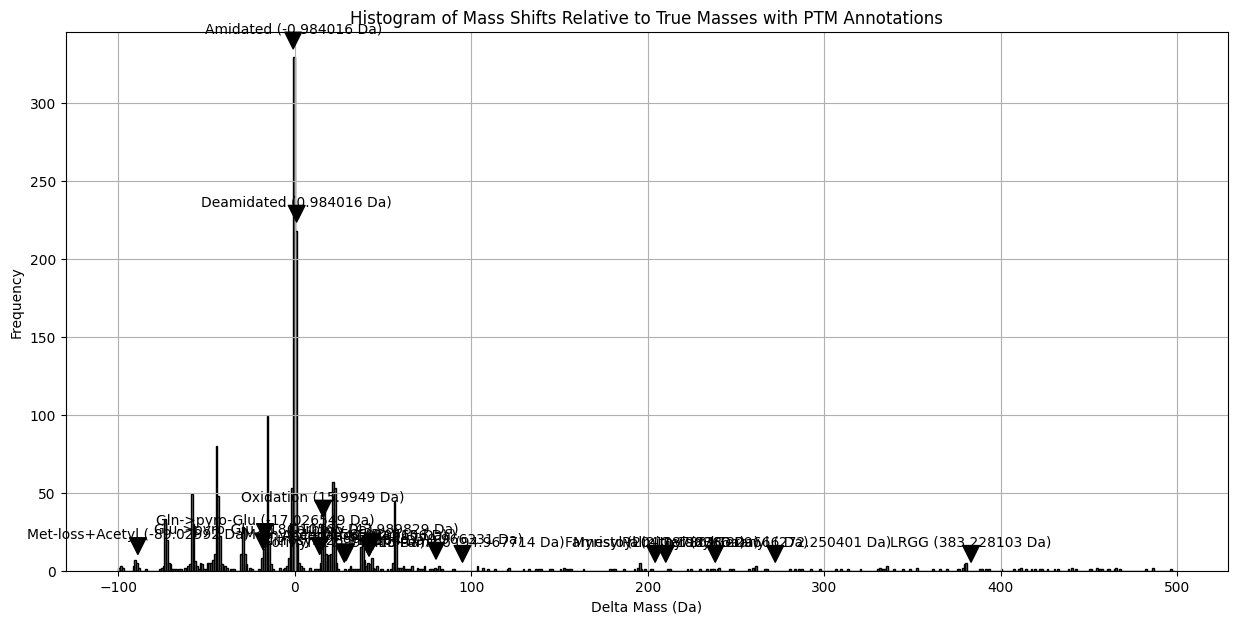

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Experimental deconvolved file.tsv', sep='\t')

# Define true masses
true_masses = np.array([9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4])

# This assumes your dataset has a column 'Observed Mass'
observed_masses = df['MonoisotopicMass'].values  # Ensure this column exists or adjust accordingly

# Calculate the closest delta mass for each observed mass
delta_masses = np.concatenate([observed_masses - mass for mass in true_masses])

# Define bins for the histogram, focusing around common PTM delta masses
bins = np.arange(-100, 500, 1)  # Adjust this range and bin width as necessary

# Plotting the histogram
plt.figure(figsize=(15, 7))
counts, bins_array, patches = plt.hist(delta_masses, bins=bins, color='gray', edgecolor='black')

# Annotate specific PTMs, these should be known delta masses of interest
ptms ={
    "Oxidation": 15.9949,
    "Acetylation": 42.0106,
    "Phospho": 79.966331,
    "Acetyl": 42.010565,
    "Amidated": -0.984016,
    "Methyl": 14.015650,
    "LRGG": 383.228103,
    "Glu->pyro-Glu": -18.010565,
    "Gln->pyro-Glu": -17.026549,
    "Carboxy": 43.989829,
    "Palmitoyl": 238.229666,
    "Myristoyl": 210.198366,
    "ADP-Ribosyl": 541.061110,
    "Farnesyl": 204.187801,
    "Nitrosyl": 28.990164,
    "GeranylGeranyl": 272.250401,
    "Formyl": 27.994915,
    "Deamidated": 0.984016,
    "Sulfo+amino": 94.967714,
    "Met-loss": -131.040485,
    "Met-loss+Acetyl": -89.029920
       }


# Adding annotations for the PTMs
for ptm, mass in ptms.items():
    index = np.digitize(mass, bins_array) - 1
    index = min(index, len(counts) - 1)  # Ensure index does not go out of bounds
    height = counts[index]
    plt.annotate(f'{ptm} ({mass} Da)', xy=(mass, height + 5),
                 xytext=(0, 10), textcoords='offset points',
                 ha='center', va='bottom', arrowprops=dict(facecolor='black', shrink=0.05))

# Labeling the plot
plt.title('Histogram of Mass Shifts Relative to True Masses with PTM Annotations')
plt.xlabel('Delta Mass (Da)')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()


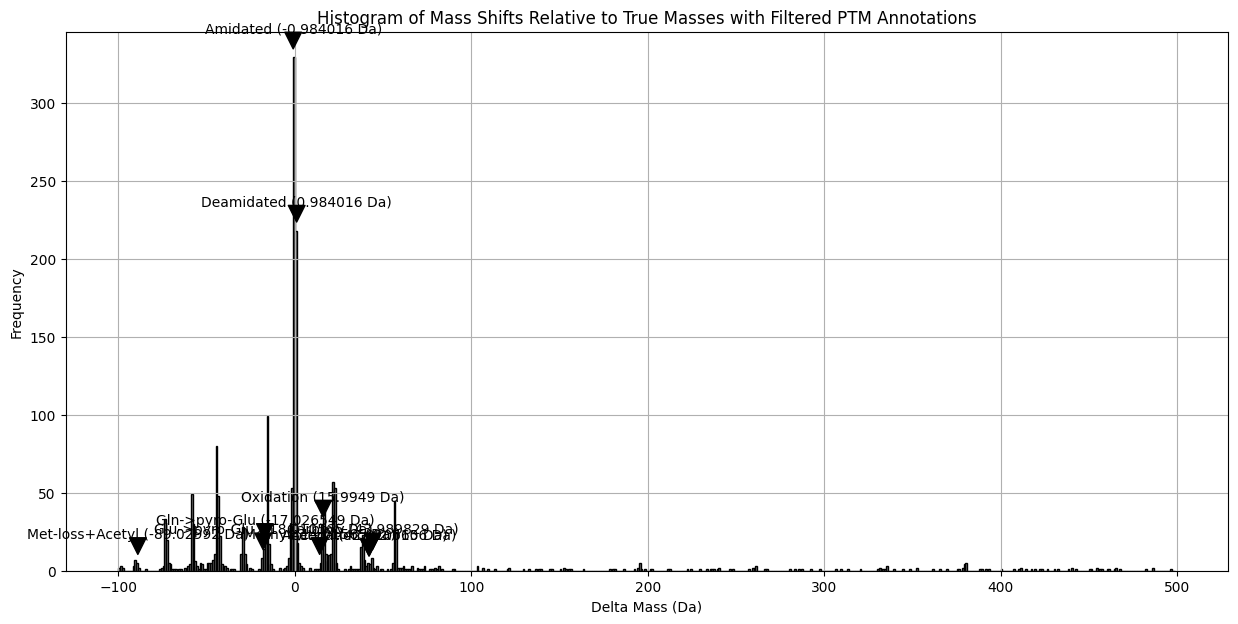

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Experimental deconvolved file.tsv', sep='\t')

# Define true masses
true_masses = np.array([9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4])

# This assumes your dataset has a column 'Observed Mass'
observed_masses = df['MonoisotopicMass'].values  # Ensure this column exists or adjust accordingly

# PTMs and their associated mass shifts
ptms = {
    "Oxidation": 15.9949,
    "Acetylation": 42.0106,
    "Phospho": 79.966331,
    "Acetyl": 42.010565,
    "Amidated": -0.984016,
    "Methyl": 14.015650,
    "LRGG": 383.228103,
    "Glu->pyro-Glu": -18.010565,
    "Gln->pyro-Glu": -17.026549,
    "Carboxy": 43.989829,
    "Palmitoyl": 238.229666,
    "Myristoyl": 210.198366,
    "ADP-Ribosyl": 541.061110,
    "Farnesyl": 204.187801,
    "Nitrosyl": 28.990164,
    "GeranylGeranyl": 272.250401,
    "Formyl": 27.994915,
    "Deamidated": 0.984016,
    "Sulfo+amino": 94.967714,
    "Met-loss": -131.040485,
    "Met-loss+Acetyl": -89.029920
}

# Calculate all delta masses
delta_masses = np.concatenate([observed_masses - mass for mass in true_masses])

# Count occurrences of each PTM-related delta mass
ptm_counts = {ptm: np.sum((delta_masses >= shift - 0.5) & (delta_masses <= shift + 0.5)) for ptm, shift in ptms.items()}

# Filter PTMs to include only those with more than two occurrences
filtered_ptms = {ptm: shift for ptm, shift in ptms.items() if ptm_counts[ptm] >= 2}

# Define bins for the histogram
bins = np.arange(-100, 500, 1)  # Adjust this range and bin width as necessary

# Plotting the histogram
plt.figure(figsize=(15, 7))
counts, bins_array, patches = plt.hist(delta_masses, bins=bins, color='gray', edgecolor='black')

# Annotating the PTMs that meet the criteria
for ptm, mass in filtered_ptms.items():
    index = np.digitize(mass, bins_array) - 1
    index = min(index, len(counts) - 1)  # Ensure index does not go out of bounds
    height = counts[index]
    plt.annotate(f'{ptm} ({mass} Da)', xy=(mass, height + 5),
                 xytext=(0, 10), textcoords='offset points',
                 ha='center', va='bottom', arrowprops=dict(facecolor='black', shrink=0.05))

# Labeling the plot
plt.title('Histogram of Mass Shifts Relative to True Masses with Filtered PTM Annotations')
plt.xlabel('Delta Mass (Da)')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.transform import factor_cmap

# Load the dataset
df = pd.read_csv('/content/Experimental deconvolved file.tsv', sep='\t')

# Define true masses
true_masses = np.array([9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4])

# Assume you have calculated the observed mass somewhere
observed_masses = df['MonoisotopicMass'].values  # Adjust according to your column name

# Calculate all delta masses
delta_masses = np.concatenate([observed_masses - mass for mass in true_masses])

# Bins for the histogram
bins = np.arange(-100, 500, 1)  # Adjust as necessary
hist, edges = np.histogram(delta_masses, bins=bins)

# Prepare labels for PTMs, initially empty, filled only where applicable
labels = [''] * len(hist)
ptms = {
     "Oxidation": 15.9949,
    "Acetylation": 42.0106,
    "Phospho": 79.966331,
    "Acetyl": 42.010565,
    "Amidated": -0.984016,
    "Methyl": 14.015650,
    "LRGG": 383.228103,
    "Glu->pyro-Glu": -18.010565,
    "Gln->pyro-Glu": -17.026549,
    "Carboxy": 43.989829,
    "Palmitoyl": 238.229666,
    "Myristoyl": 210.198366,
    "ADP-Ribosyl": 541.061110,
    "Farnesyl": 204.187801,
    "Nitrosyl": 28.990164,
    "GeranylGeranyl": 272.250401,
    "Formyl": 27.994915,
    "Deamidated": 0.984016,
    "Sulfo+amino": 94.967714,
    "Met-loss": -131.040485,
    "Met-loss+Acetyl": -89.029920
}
# Assign labels at relevant positions
for ptm, shift in ptms.items():
    bin_index = np.digitize([shift], bins)[0] - 1  # Get the bin index for each PTM
    if bin_index < len(labels):
        labels[bin_index] = f'{ptm} ({shift} Da)'

# Create ColumnDataSource
source = ColumnDataSource(data={
    'top': hist,
    'left': edges[:-1],
    'right': edges[1:],
    'label': labels
})

# Output to notebook
output_notebook()

# Create the plot
p = figure(width=800, height=300, title="PTM Delta Mass Histogram",
           tools="pan,wheel_zoom,box_zoom,reset", x_axis_label='Delta Mass (Da)', y_axis_label='Frequency')

# Add quads for the histogram
p.quad(bottom=0, top='top', left='left', right='right', source=source, fill_color='gray', line_color='black')

# Add hover tool
hover = HoverTool(tooltips=[("PTM", "@label"), ("Count", "@top")])
p.add_tools(hover)

# Show the plot
show(p)


In [ ]:
import pandas as pd
import numpy as np
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.transform import factor_cmap

# Load the dataset
df = pd.read_csv('/content/Experimental deconvolved file.tsv', sep='\t')

# Define true masses
true_masses = np.array([9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4])

# Assume you have calculated the observed mass somewhere
observed_masses = df['MonoisotopicMass'].values  # Adjust according to your column name

# Calculate all delta masses
delta_masses = np.concatenate([observed_masses - mass for mass in true_masses])

# Bins for the histogram
bins = np.arange(-100, 500, 1)  # Adjust as necessary
hist, edges = np.histogram(delta_masses, bins=bins)

# Prepare labels for PTMs, initially empty, filled only where applicable
labels = [''] * len(hist)
ptms = {
      "Oxidation": 15.9949,
    "Acetylation": 42.0106,
    "Phospho": 79.966331,
    "Acetyl": 42.010565,
    "Amidated": -0.984016,
    "Methyl": 14.015650,
    "LRGG": 383.228103,
    "Glu->pyro-Glu": -18.010565,
    "Gln->pyro-Glu": -17.026549,
    "Carboxy": 43.989829,
    "Palmitoyl": 238.229666,
    "Myristoyl": 210.198366,
    "ADP-Ribosyl": 541.061110,
    "Farnesyl": 204.187801,
    "Nitrosyl": 28.990164,
    "GeranylGeranyl": 272.250401,
    "Formyl": 27.994915,
    "Deamidated": 0.984016,
    "Sulfo+amino": 94.967714,
    "Met-loss": -131.040485,
    "Met-loss+Acetyl": -89.029920
}
# Assign labels at relevant positions
for ptm, shift in ptms.items():
    bin_index = np.digitize([shift], bins)[0] - 1  # Get the bin index for each PTM
    if bin_index < len(labels):
        labels[bin_index] = f'{ptm} ({shift} Da)'

# Create ColumnDataSource
source = ColumnDataSource(data={
    'top': hist,
    'left': edges[:-1],
    'right': edges[1:],
    'label': labels
})

# Output to notebook
output_notebook()

# Create the plot
p = figure(width=800, height=300, title="PTM Delta Mass Histogram",
           tools="pan,wheel_zoom,box_zoom,reset", x_axis_label='Delta Mass (Da)', y_axis_label='Frequency')

# Add quads for the histogram
p.quad(bottom=0, top='top', left='left', right='right', source=source, fill_color='gray', line_color='black')

# Add hover tool
hover = HoverTool(tooltips=[("PTM", "@label"), ("Count", "@top")])
p.add_tools(hover)

# Show the plot
show(p)


In [ ]:
import pandas as pd
import numpy as np
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.transform import factor_cmap

# Load the dataset
df = pd.read_csv('/content/Experimental deconvolved file.tsv', sep='\t')

# Define true masses
true_masses = np.array([9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4])

# Calculate observed mass and delta masses
observed_masses = df['MonoisotopicMass'].values
delta_masses = np.concatenate([observed_masses - mass for mass in true_masses])

# Bins for the histogram
bins = np.arange(-100, 500, 1)
hist, edges = np.histogram(delta_masses, bins=bins)

# Prepare labels for PTMs, initially empty, filled only where applicable
labels = [''] * len(hist)
ptms = {
    "Oxidation": 15.9949,
    "Acetylation": 42.0106,
    "Phospho": 79.966331,
    # Additional PTMs...
}

# Assign labels at relevant positions
for ptm, shift in ptms.items():
    bin_index = np.digitize([shift], bins)[0] - 1
    if bin_index < len(labels):
        labels[bin_index] = f'{ptm} ({shift} Da)'

# Create ColumnDataSource
source = ColumnDataSource(data={
    'top': hist,
    'left': edges[:-1],
    'right': edges[1:],
    'label': labels
})

# Output to notebook
output_notebook()

# Create the plot without grid lines
p = figure(width=800, height=300, title="PTM Delta Mass Histogram",
           tools="pan,wheel_zoom,box_zoom,reset",
           x_axis_label='Delta Mass (Da)', y_axis_label='Frequency')

# Remove grid lines
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

# Add quads for the histogram
p.quad(bottom=0, top='top', left='left', right='right', source=source, fill_color='gray', line_color='black')

# Add hover tool
hover = HoverTool(tooltips=[("PTM", "@label"), ("Count", "@top")])
p.add_tools(hover)

# Show the plot
show(p)


In [ ]:
import pandas as pd
import numpy as np
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool, LabelSet
from bokeh.layouts import column

# Load the dataset
df = pd.read_csv('/content/Experimental deconvolved file.tsv', sep='\t')

# Define true masses
true_masses = np.array([9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4])

# Assuming 'Observed Mass' column exists in your dataset, calculate delta masses
observed_masses = df['MonoisotopicMass'].values  # Replace 'Observed Mass' with the actual column name if different

# Calculate all delta masses
delta_masses = np.concatenate([observed_masses - mass for mass in true_masses])

# Bins for the histogram
bins = np.arange(-100, 500, 1)  # Adjust as necessary
hist, edges = np.histogram(delta_masses, bins=bins)

# Create ColumnDataSource for the histogram
hist_source = ColumnDataSource(data={
    'top': hist,
    'left': edges[:-1],
    'right': edges[1:]
})

# Define PTMs and their associated mass shifts
ptms = {
     "Oxidation": 16,
    "Acetylation": 42,
    "Phospho": 80,
    "Acetyl": 42,
    "Amidated": -1,
    "Methyl": 14,
    "LRGG": 383,
    "Glu->pyro-Glu": -18,
    "Gln->pyro-Glu": -17,
    "Carboxy": 44,
    "Palmitoyl": 238,
    "Myristoyl": 210,
    "ADP-Ribosyl": 541,
    "Farnesyl": 204,
    "Nitrosyl": 29,
    "GeranylGeranyl": 272,
    "Formyl": 28,
    "Deamidated": 1,
    "Sulfo+amino": 95,
    "Met-loss": -131,
    "Met-loss+Acetyl": -89
}

# Prepare data for PTM labels
ptm_data = {
    'x': [],
    'y': [],
    'text': []
}
for ptm, shift in ptms.items():
    bin_index = np.digitize([shift], bins)[0] - 1
    if bin_index < len(hist) and hist[bin_index] > 0:
        ptm_data['x'].append(shift)
        ptm_data['y'].append(hist[bin_index] + 5)  # slightly above the histogram bar
        ptm_data['text'].append(f'{ptm} ({shift} Da)')

# Create ColumnDataSource for PTM labels
label_source = ColumnDataSource(data=ptm_data)

# Output to notebook
output_notebook()

# Create the plot
p = figure(width=800, height=300, title="PTM Delta Mass Histogram",
           tools="pan,wheel_zoom,box_zoom,reset", x_axis_label='Delta Mass (Da)', y_axis_label='Frequency')

# Add quads for the histogram
p.quad(bottom=0, top='top', left='left', right='right', source=hist_source, fill_color='gray', line_color='black')

# Add labels for PTMs
labels = LabelSet(x='x', y='y', text='text', level='glyph',
                  x_offset=5, y_offset=5, source=label_source, text_font_size="8pt", text_color="black")
p.add_layout(labels)

# Add hover tool that will display the count
hover = HoverTool(tooltips=[("Count", "@top"), ("Delta Mass", "@left{0.0}")])
p.add_tools(hover)

# Show the plot
show(p)


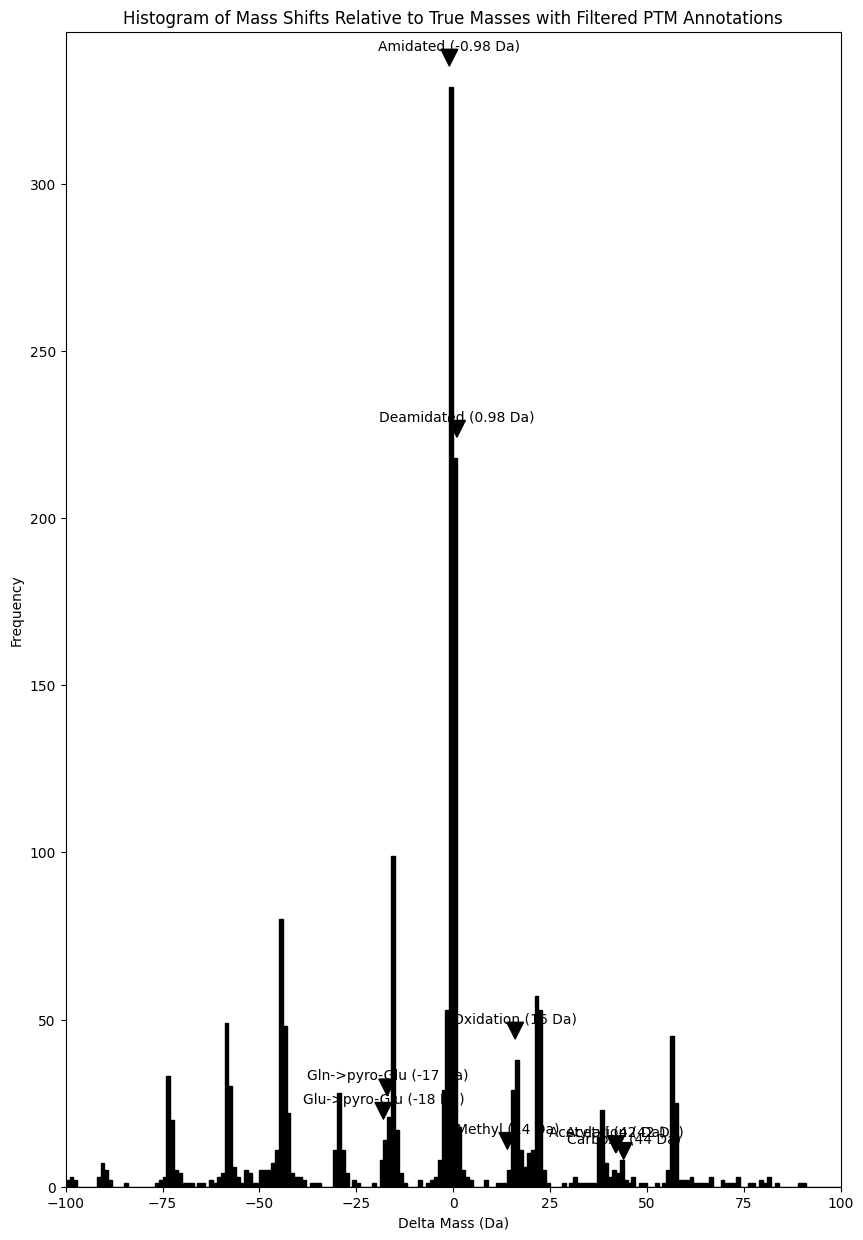

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Experimental deconvolved file.tsv', sep='\t')

# Define true masses
true_masses = np.array([9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4])

# This assumes your dataset has a column 'Observed Mass'
observed_masses = df['MonoisotopicMass'].values  # Ensure this column exists or adjust accordingly

# PTMs and their associated mass shifts
ptms = {
    "Oxidation": 16,
    "Acetylation": 42,
    "Phospho": 80,
    "Acetyl": 42,
    "Amidated": -0.98,
    "Methyl": 14,
    "LRGG": 383,
    "Glu->pyro-Glu": -18,
    "Gln->pyro-Glu": -17,
    "Carboxy": 44,
    "Palmitoyl": 238,
    "Myristoyl": 210,
    "ADP-Ribosyl": 541,
    "Farnesyl": 204,
    "Nitrosyl": 29,
    "GeranylGeranyl": 272,
    "Formyl": 28,
    "Deamidated": 0.98,
    "Sulfo+amino": 95,
    "Met-loss": -131,
    "Met-loss+Acetyl": -89

}

# Calculate all delta masses
delta_masses = np.concatenate([observed_masses - mass for mass in true_masses])

# Count occurrences of each PTM-related delta mass
ptm_counts = {ptm: np.sum((delta_masses >= shift - 0.5) & (delta_masses <= shift + 0.5)) for ptm, shift in ptms.items()}

# Filter PTMs to include only those with more than two occurrences
filtered_ptms = {ptm: shift for ptm, shift in ptms.items() if ptm_counts[ptm] > 2}

# Define bins for the histogram
bins = np.arange(-100, 500, 1)  # Adjust this range and bin width as necessary

# Plotting the histogram
plt.figure(figsize=(10, 15))
counts, bins_array, patches = plt.hist(delta_masses, bins=bins, color='black', edgecolor='black')

# Annotating the PTMs that meet the criteria
for ptm, mass in filtered_ptms.items():
    index = np.digitize(mass, bins_array) - 1
    index = min(index, len(counts) - 1)  # Ensure index does not go out of bounds
    height = counts[index]
    plt.annotate(f'{ptm} ({mass} Da)', xy=(mass, height + 6),
                 xytext=(0, 10), textcoords='offset points',
                 ha='center', va='bottom', arrowprops=dict(facecolor='black', shrink=0.05))

# Labeling the plot
plt.title('Histogram of Mass Shifts Relative to True Masses with Filtered PTM Annotations')
plt.xlabel('Delta Mass (Da)')
plt.ylabel('Frequency')
plt.xlim(-100, 100)  # Limit x-axis from -100 to 100
plt.grid(False)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool, Legend
from bokeh.palettes import Category20_20
from bokeh.transform import factor_cmap

# Load the dataset
df = pd.read_csv('/content/190507_Thermo_Std_FD2_ms1.tsv', sep='\t')

# Apply the 5% FDR threshold to get significant results
q_value_threshold = 0.05
filtered_df = df[df['Qvalue'] <= q_value_threshold]

# Separate targets and decoys based on TargetDecoyType
targets = filtered_df[filtered_df['TargetDecoyType'] == 0]  # All true positive targets
decoys = filtered_df[filtered_df['TargetDecoyType'] >= 1]  # All false positive decoys

# Calculate Estimated FDR
# If there are no targets, FDR cannot be calculated
if len(targets) > 0:
    estimated_fdr = len(decoys) / len(targets)
else:
    estimated_fdr = np.nan  # Not a Number if there are no targets

print("Estimated FDR:", estimated_fdr)

# Define true masses
true_masses = np.array([9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4])

# Define the PTMs and their masses
ptms = {
   "Oxidation": 16,
    "Acetylation": 42,
    "Phospho": 80,
    "Acetyl": 42,
    "Amidated": -0.98,
    "Methyl": 14,
    "LRGG": 383,
    "Glu->pyro-Glu": -18,
    "Gln->pyro-Glu": -17,
    "Carboxy": 44,
    "Palmitoyl": 238,
    "Myristoyl": 210,
    "ADP-Ribosyl": 541,
    "Farnesyl": 204,
    "Nitrosyl": 29,
    "GeranylGeranyl": 272,
    "Formyl": 28,
    "Deamidated": 0.98,
    "Sulfo+amino": 95,
    "Met-loss": -131,
    "Met-loss+Acetyl": -89
}

# Function to find nearest intensity for a given mass
def find_nearest_intensity(mass, dataframe, width=10):
    mass_window = dataframe[(dataframe['MonoisotopicMass'] >= mass - width) &
                            (dataframe['MonoisotopicMass'] <= mass + width)]
    if not mass_window.empty:
        return mass_window.loc[mass_window['SumIntensity'].idxmax()]['SumIntensity']
    return 0

# Collect modified masses and keep only those with more than 2 occurrences
def collect_modified_masses(true_masses, ptms, df, width=10):
    modified_masses = []
    colors = []
    labels = []

    for mass in true_masses:
        for ptm, delta_mass in ptms.items():
            mod_mass = mass + delta_mass
            intensity = find_nearest_intensity(mod_mass, df, width)
            if intensity > 0:
                modified_masses.append((mod_mass, intensity, ptm))
                colors.append(ptm)
                labels.append(f"{ptm} (+{delta_mass})")

    # Filter out modifications that don't appear at least twice
    ptm_count = pd.DataFrame(modified_masses, columns=["Mass", "Intensity", "PTM"])
    frequent_ptms = ptm_count["PTM"].value_counts()
    valid_ptms = frequent_ptms[frequent_ptms >= 2].index

    final_masses = ptm_count[ptm_count["PTM"].isin(valid_ptms)]

    return final_masses

# Collect true and modified masses
true_mass_intensities = [(mass, find_nearest_intensity(mass, filtered_df, 10)) for mass in true_masses]
modified_masses = collect_modified_masses(true_masses, ptms, filtered_df)

# Create ColumnDataSource for the modified and true masses
modified_source = ColumnDataSource(data={
    'x': list(modified_masses["Mass"]),
    'y': list(modified_masses["Intensity"]),
    'color': list(modified_masses["PTM"]),
    'label': list(modified_masses["PTM"])
})

true_mass_source = ColumnDataSource(data={
    'x': [m[0] for m in true_mass_intensities],
    'y': [m[1] for m in true_mass_intensities]
})

# Configure Bokeh to display plots in the notebook
output_notebook()

# Create the plot
p = figure(width=800, height=300, title='Peptide Fragmentation Mass Spectrum',
           tools='xwheel_zoom,xpan,box_zoom,undo,reset',
           tooltips="@label: @x{0.0000} Da")

# Add circles for PTM-modified masses
p.circle('x', 'y', size=8, source=modified_source,
         color=factor_cmap('color', palette=Category20_20, factors=list(set(modified_masses["PTM"]))),
         legend_field='color')

# Add squares for true masses
p.square('x', 'y', size=10, color="black", source=true_mass_source, legend_label='True Masses')

# Configure plot aesthetics
p.legend.title = 'PTM Type and True Masses'
p.legend.location = 'top_right'
p.xaxis.axis_label = "Mass/Da"
p.yaxis.axis_label = "Intensity"

# Show the plot
show(p)


Estimated FDR: 0.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
from bokeh.io import show, export_png
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.io.export import export_png
!pip install selenium
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

# Create ChromeOptions object
chrome_options = Options()

# Initialize ChromeDriver with options
driver = webdriver.Chrome('chromedriver', options=chrome_options)
driver.get("data:text/html;charset=utf-8,{html}".format(html=p.to_html()))
driver.save_screenshot("deconvolved_plot.png")
driver.quit()

# ... (rest of your code)

# Load the dataset
df = pd.read_csv('/content/Experimental deconvolved file.tsv', sep='\t')

# Filter the dataset to include only those entries where TargetDecoyType = 0 and Qvalue <= 0.05
filtered_df = df[(df['TargetDecoyType'] == 0) & (df['Qvalue'] <= 0.05)]

# Define true masses
true_masses = np.array([9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4])

# Function to find nearest intensity for a given mass
def find_nearest_intensity(mass, dataframe, width=10):
    # Find the subset of dataframe where mass is within a certain window
    mass_window = dataframe[(dataframe['MonoisotopicMass'] >= mass - width) & (dataframe['MonoisotopicMass'] <= mass + width)]
    if not mass_window.empty:
        # Return the highest intensity in this window
        return mass_window.loc[mass_window['SumIntensity'].idxmax()]['SumIntensity']
    return None

# Add markers for true masses
true_mass_markers = {'mass': [], 'intensity': [], 'label': []}
for mass in true_masses:
    intensity = find_nearest_intensity(mass, filtered_df)
    if intensity:
        true_mass_markers['mass'].append(mass)
        true_mass_markers['intensity'].append(intensity)
        true_mass_markers['label'].append(f'{mass:.4f}')

# Convert markers to ColumnDataSource
true_mass_cds = ColumnDataSource(data=true_mass_markers)

# Create a ColumnDataSource from the filtered DataFrame
cds = ColumnDataSource(data=filtered_df)

def create_p(width=800, height=300, main_title='Deconvolved PIP data set from FD'):
    tooltips = [
        ('m/z', '@MonoisotopicMass{0.0000}'),
        ('Int', '@SumIntensity')
    ]
    p = figure(
        width=width, height=height,
        title=main_title,
        tools='xwheel_zoom,xpan,box_zoom,undo,reset',
        tooltips=tooltips
    )
    return p

# Create the plot
p = create_p()

# Add a vertical bar plot to the figure
p.vbar(
    x='MonoisotopicMass', top='SumIntensity',
    source=cds,
    color='#324ea8',
    width=0.001  # Set the width of the bars
)

# Add red dots for true masses using scatter instead of circle
p.scatter(
    x='mass', y='intensity',
    source=true_mass_cds,
    size=10,
    color='red',
    marker='circle'  # Specify marker type
)

# Add labels above red dots
labels = LabelSet(x='mass', y='intensity', text='label', level='glyph',
                  x_offset=0, y_offset=3, source=true_mass_cds,
                  text_font_size="8pt", text_color="black")
p.add_layout(labels)

# Save the plot as a PNG file
export_png(p, filename="deconvolved_plot.png")

# Show the plot (optional)
show(p)


TypeError: WebDriver.__init__() got multiple values for argument 'options'

In [ ]:
!apt-get update
!apt install chromium-chromedriver
!pip install selenium


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Ign:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading pack

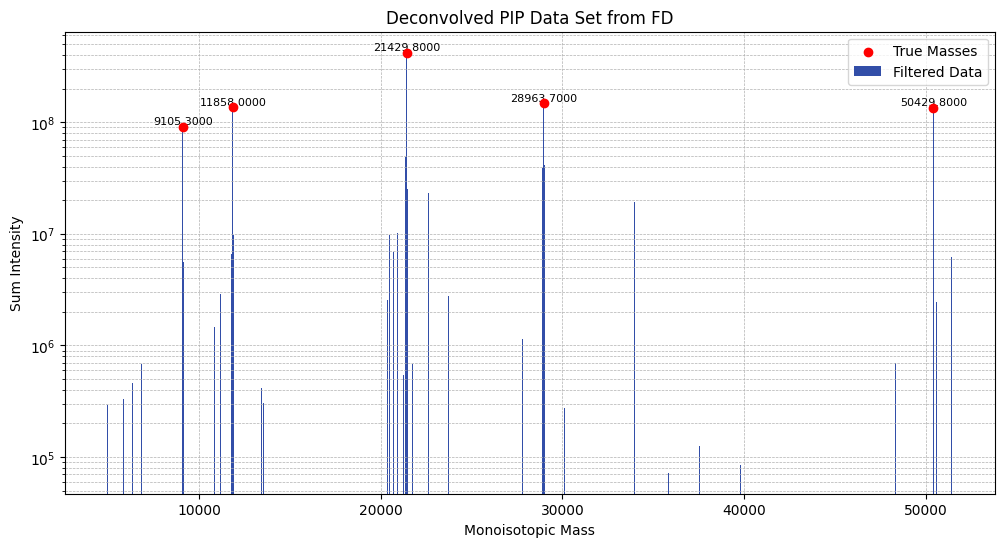

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Experimental deconvolved file.tsv', sep='\t')

# Filter the dataset to include only those entries where TargetDecoyType = 0 and Qvalue <= 0.05
filtered_df = df[(df['TargetDecoyType'] == 0) & (df['Qvalue'] <= 0.05)]

# Define true masses
true_masses = np.array([9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4])

# Function to find nearest intensity for a given mass
def find_nearest_intensity(mass, dataframe, width=10):
    # Find the subset of dataframe where mass is within a certain window
    mass_window = dataframe[(dataframe['MonoisotopicMass'] >= mass - width) & (dataframe['MonoisotopicMass'] <= mass + width)]
    if not mass_window.empty:
        # Return the highest intensity in this window
        return mass_window.loc[mass_window['SumIntensity'].idxmax()]['SumIntensity']
    return None

# Add markers for true masses
true_mass_markers = {'mass': [], 'intensity': [], 'label': []}
for mass in true_masses:
    intensity = find_nearest_intensity(mass, filtered_df)
    if intensity:
        true_mass_markers['mass'].append(mass)
        true_mass_markers['intensity'].append(intensity)
        true_mass_markers['label'].append(f'{mass:.4f}')

# Plotting with Matplotlib
plt.figure(figsize=(12, 6))

# Plotting the main data as vertical bars with increased width
plt.bar(filtered_df['MonoisotopicMass'], filtered_df['SumIntensity'], color='#324ea8', width=50, label='Filtered Data')

# Plotting the true masses as red dots
plt.scatter(true_mass_markers['mass'], true_mass_markers['intensity'], color='red', zorder=5, label='True Masses')

# Adding labels for the true masses
for mass, intensity, label in zip(true_mass_markers['mass'], true_mass_markers['intensity'], true_mass_markers['label']):
    plt.text(mass, intensity, label, fontsize=8, ha='center', va='bottom')

# Use a logarithmic scale for the y-axis to improve visibility of all peaks
plt.yscale('log')

# Adding gridlines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adding labels and title
plt.xlabel('Monoisotopic Mass')
plt.ylabel('Sum Intensity')
plt.title('Deconvolved PIP Data Set from FD')
plt.legend()

# Save the plot as a PNG file
plt.savefig('deconvolved_plot.png')

# Show the plot
plt.show()


In [1]:
import pandas as pd

# Define the monoisotopic masses for amino acids (in Daltons)
AMINO_ACID_MASSES = {
    'A': 71.03711, 'R': 156.10111, 'N': 114.04293, 'D': 115.02694, 'C': 103.00919,
    'E': 129.04259, 'Q': 128.05858, 'G': 57.02146,  'H': 137.05891, 'I': 113.08406,
    'L': 113.08406, 'K': 128.09496, 'M': 131.04049, 'F': 147.06841, 'P': 97.05276,
    'S': 87.03203,  'T': 101.04768, 'W': 186.07931, 'Y': 163.06333, 'V': 99.06841
}

# Mass adjustments for ions
PROTON_MASS = 1.007276
B_ION_OFFSET = 0  # b-ions: no proton in neutral form
Y_ION_OFFSET = 18.010565  # y-ions: H2O (neutral)

def calculate_neutral_monoisotopic_mass(sequence, ion_type):
    masses = []
    fragment_mass = 0

    if ion_type == 'b':
        # N-terminal ions: b-ions
        for i in range(len(sequence)):
            aa = sequence[i]
            if aa not in AMINO_ACID_MASSES:
                raise ValueError(f"Unknown amino acid '{aa}' in sequence.")
            fragment_mass += AMINO_ACID_MASSES[aa]
            masses.append(fragment_mass + B_ION_OFFSET)
    elif ion_type == 'y':
        # C-terminal ions: y-ions (reverse sequence)
        for i in range(len(sequence)):
            aa = sequence[-(i+1)]
            if aa not in AMINO_ACID_MASSES:
                raise ValueError(f"Unknown amino acid '{aa}' in sequence.")
            fragment_mass += AMINO_ACID_MASSES[aa]
            masses.append(fragment_mass + Y_ION_OFFSET)

    return masses

# Define the sequences and scan numbers
sequences = {
    "sequence_1": {"sequence": "MRWQEMGYIFYPRKLR", "scan_number": 6},
    "sequence_2": {"sequence": "MENEDGYMTLSFKNRCKSKQKSKDFSLYPQYYCLLLIFGCIVILIFIMTGIDLKFWHKKMDFSQNVNVSSLSGHNYLCPNDWLLNEGKCYWFSTSFKTWKESQRDCTQLQAHLLVIQNLDELEFIQNSLKPGHFGWIGLYVTFQGNLWMWIDEHFLVPELFSVIGPTDDRSCAVITGNWVYSEDCSSTFKGICQRDAILTHNGTSGV", "scan_number": 7},
    "sequence_3": {"sequence": "MKRRQKRKHLENEESQETAEKGGGMSKSQEDALQPGSTRVAKGWSQGVGEVTSTSEYCSCVSSSRKLIHSGIQRIHRDSPQPQSPLAQVQERGETPPRSQHVSLSSYSSYKTCVSSLCVNKEERGMKIYYMQVQMNKGVAVSWETEETLESLEKQPRMEEVTLSEVVRVGTPPSDVSTRNLLSDSEPSGEEKEHEERTESDSLPGSPTVEDTPRAKTPDWLVTMENGFRCMACCRVFTTMEALQEHVQFGIREGFSCHVFHLTMAQLTGNMESESTQDEQEEENGNEKEEEEKPEAKEEEGQPTEEDLGLRRSWSQCPGCVFHSPKDRNS", "scan_number": 8},
    "sequence_4": {"sequence": "MARVGPGRAGVSCQGRGRGRGGSGQRRPPTWEISDSDAEDSAGSEAAARARDPAGERRAAAEALRLLRPEQVLKRLAVCVDTAILEDAGADVLMEALEALGCECRIEPQRPARSLRWTRASPDPCPRSLPPEVWAAGEQELLLLLEPEEFLQGVATLTQISGPTHWVPWISPETTARPHLAVIGLDAYLWSRQHVSRGTQQPESPKVAGAEVAVSWPEVEEALVLLQLWANLDVLLVASWQELSRHVCAVTKALAQYPLKQYRESQAFSFCTAGRWAAGEPVARDGAGLQAAWRRQIRQFSRVSPAVADAVVTAFPSPRLLQQALEACSTERERMGLLADLPVPPSEGGRPRRVGPDLSRRICLFLTTANPDLLLDLGS", "scan_number": 9},
    "sequence_5": {"sequence": "MFADRWLFSTNHKDIGTLYLLFGAWAGVLGTALSLLIRAELGQPGNLLGNDHIYNVIVTAHAFVMIFFMVMPIMIGGFGNWLVPLMIGAPDMAFPRMNNMSFWLLPPSLLLLLASAMVEAGAGTGWTVYPPLAGNYSHPGASVDLTIFSLHLAGVSSILGAINFITTIINMKPPAMTQYQTPLFVWSVLITAVLLLLSLPVLAAGITMLLTDRNLNTTFFDPAGGGDPILYQHLFWFFGHPEVYILILPGFGMVSHIVTYYSGKKEPFGYMGMVWAMMSIGFLGFIVWAHHMFTVGMDVDTRAYFTSATMIIAIPTGVKVFSWLATLHGSNMKWSAAVLWALGFIFLFTVGGLTGIVLANSSLDIVLHDTYYVVAHFHYVLSMGAVFAIMGGFIHWFPLFSGYTLDQTYAKIHFTIMFIGVNLTFFPQHFLGLSGMPRRYSDYPDAYTTWNILSSVGSFISLTAVMLMIFMIWEAFASKRKVLMVEEPSMNLEWLYGCPPPYHTFEEPVYMKS", "scan_number": 10}
}

# Prepare data for CSV output
data = []

for name, info in sequences.items():
    sequence = info["sequence"]
    scan_number = info["scan_number"]

    # Calculate b-ions and y-ions
    b_ions = calculate_neutral_monoisotopic_mass(sequence, 'b')
    y_ions = calculate_neutral_monoisotopic_mass(sequence, 'y')

    # Store the data in rows for each fragment (b and y ions)
    for i in range(len(b_ions)):
        data.append([scan_number, f"{name}_b{i+1}", b_ions[i]])
    for i in range(len(y_ions)):
        data.append([scan_number, f"{name}_y{i+1}", y_ions[i]])

# Convert to DataFrame and save to CSV
df = pd.DataFrame(data, columns=["Scan Number", "Fragment", "Neutral Mass"])
output_csv_path = "neutral_fragment_masses based on mass range.csv"
df.to_csv(output_csv_path, index=False)

print(f"CSV file saved at: {output_csv_path}")


CSV file saved at: neutral_fragment_masses based on mass range.csv


In [88]:
#Select Scan numbers
import pandas as pd

# Load the TSV file
input_file = '/content/FP class3_centroid_ms2_iso0.tsv'  # Replace with the path to your file
output_file = 'filtered_outputisotope1 Scan 6.tsv'

# Read the TSV file into a pandas DataFrame
df = pd.read_csv(input_file, sep='\t')

# Filter rows where ScanNum is 4, 6, or 8
filtered_df = df[df['ScanNum'].isin([6])]

# Save the filtered data to a new TSV file
filtered_df.to_csv(output_file, sep='\t', index=False)

print(f"Filtered data saved to {output_file}")


Filtered data saved to filtered_outputisotope1 Scan 6.tsv


In [21]:
#For iso=0
import pandas as pd

# Function to calculate ppm difference
def ppm_difference(mass1, mass2):
    return abs(mass1 - mass2) / mass2 * 1e6

# Load file A (filtered.tsv) and file B (true mass CSV)
file_a = '/content/filtered_outputisotope0 Scan 6.tsv'  # Replace with the path to file A
file_b = '/content/neutral_fragment_masses based on mass range.csv'  # Replace with the path to file B
output_file = 'filtered_with_tp_fp iso0 Scan6.csv'

# Read the filtered.tsv into a pandas DataFrame
df_a = pd.read_csv(file_a, sep='\t')

# Read the true mass file (file B) into a pandas DataFrame
df_b = pd.read_csv(file_b)

# Filter rows in file A where TargetDecoyType = 0
df_a_filtered = df_a[df_a['TargetDecoyType'] == 0].copy()

# Add a new column 'TP_FP' to mark True Positive (TP) and False Positive (FP)
df_a_filtered['TP_FP'] = 'FP'  # Initialize all as FP

# Compare MonoisotopicMass from file A to NeutralMass from file B with 10ppm tolerance
tolerance_ppm = 10

for i, row_a in df_a_filtered.iterrows():
    mass_a = row_a['MonoisotopicMass']

    # Check for any matching masses within the tolerance in file B
    match_found = any(ppm_difference(mass_a, mass_b) <= tolerance_ppm for mass_b in df_b['Neutral Mass'])

    # If a match is found, mark as TP
    if match_found:
        df_a_filtered.at[i, 'TP_FP'] = 'TP'

# Merge the TP/FP column back into the original file A
df_a['TP_FP'] = df_a_filtered['TP_FP']

# Save the updated dataframe with TP/FP information back to a new TSV file
df_a.to_csv(output_file, sep='\t', index=False)

print(f"File with TP/FP column saved to {output_file}")


File with TP/FP column saved to filtered_with_tp_fp iso0 Scan6.csv


In [93]:
#script corrected
import pandas as pd

# Function to calculate ppm difference
def ppm_difference(mass1, mass2):
    return abs(mass1 - mass2) / mass2 * 1e6

# Load file A (filtered.tsv) and file B (true mass CSV)
file_a = '/content/FP class3_centroid_ms2_iso0.tsv' # Replace with the path to file A
file_b = '/content/neutral_fragment_masses based on mass range.csv'  # Replace with the path to file B
output_file = 'filtered_with_tp_fp iso0 Scan6.csv'

# Read the filtered.tsv into a pandas DataFrame (file A)
df_a = pd.read_csv(file_a, sep='\t')

# Read the true mass file (file B) into a pandas DataFrame
df_b = pd.read_csv(file_b)

# Filter rows in file A where TargetDecoyType = 0
df_a_filtered = df_a[df_a['TargetDecoyType'] == 0].copy()

# Add a new column 'TP_FP' to mark True Positive (TP) and False Positive (FP)
df_a_filtered['TP_FP'] = 'FP'  # Initialize all as FP

# Set tolerance in ppm
tolerance_ppm = 10

# Iterate over each row in file A (filtered rows where TargetDecoyType == 0)
for i, row_a in df_a_filtered.iterrows():
    mass_a = row_a['MonoisotopicMass']
    scan_a = row_a['ScanNum']  # Assuming file A has the 'ScanNum' column

    # Check for any matching masses and scan numbers within tolerance in file B
    match_found = any(
        ppm_difference(mass_a, mass_b) <= tolerance_ppm and scan_a == scan_b
        for mass_b, scan_b in zip(df_b['Neutral Mass'], df_b['Scan Number'])  # Assuming file B has 'Scan Number' column
    )

    # If a match is found, mark it as TP (True Positive)
    if match_found:
        df_a_filtered.at[i, 'TP_FP'] = 'TP'

# Merge the TP/FP column back into the original file A DataFrame
df_a['TP_FP'] = df_a_filtered['TP_FP']

# Save the updated DataFrame with TP/FP information back to a new file
df_a.to_csv(output_file, sep='\t', index=False)

print(f"File with TP/FP column saved to {output_file}")


File with TP/FP column saved to filtered_with_tp_fp iso0 Scan6.csv


In [4]:
pip install matplotlib seaborn


Index(['Index', 'FileName', 'ScanNum', 'FeatureIndex', 'TargetDecoyType',
       'RetentionTime', 'MassCountInSpec', 'AverageMass', 'MonoisotopicMass',
       'SumIntensity', 'MinCharge', 'MaxCharge', 'PeakCount',
       'PrecursorScanNum', 'PrecursorFeatureIndex', 'PrecursorMz',
       'PrecursorIntensity', 'PrecursorCharge', 'PrecursorSNR',
       'PrecursorMonoisotopicMass', 'PrecursorQscore', 'PrecursorQscore2D',
       'PrecursorQvalue', 'IsotopeCosine', 'ChargeCosine', 'ChargeScore',
       'MassSNR', 'ChargeSNR', 'AveragePPMError', 'RepresentativeCharge',
       'RepresentativeMzStart', 'RepresentativeMzEnd', 'Qscore', 'Qscore2D',
       'Qvalue', 'Unnamed: 35', 'TP_FP'],
      dtype='object')


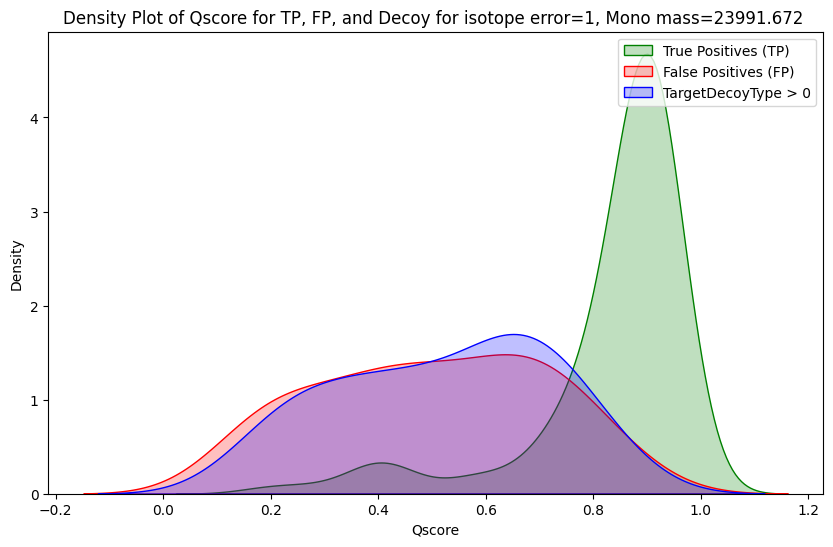

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the TSV file with tab delimiter
file_a = '/content/filtered_with_tp_fpiso1 scan6.csv'  # Replace with the path to your file
df = pd.read_csv(file_a, sep='\t')

# Clean the column names by stripping extra spaces
df.columns = df.columns.str.strip()

# Verify column names to ensure Qscore and TP_FP are present
print(df.columns)

# Drop rows with missing Qscore values (if any)
df = df.dropna(subset=['Qscore'])

# Filter data for different categories
df_tp = df[df['TP_FP'] == 'TP']  # True Positives
df_fp = df[df['TP_FP'] == 'FP']  # False Positives
df_decoy = df[df['TargetDecoyType'] > 0]  # TargetDecoyType > 0

# Plot density plots using seaborn
plt.figure(figsize=(10, 6))

sns.kdeplot(df_tp['Qscore'], label='True Positives (TP)', color='green', fill=True)
sns.kdeplot(df_fp['Qscore'], label='False Positives (FP)', color='red', fill=True)
sns.kdeplot(df_decoy['Qscore'], label='TargetDecoyType > 0', color='blue', fill=True)

# Add labels and title
plt.xlabel('Qscore')
plt.ylabel('Density')
plt.title('Density Plot of Qscore for TP, FP, and Decoy for isotope error=1, Mono mass=23991.672 ')
plt.legend()
# Show the plot.
plt.show()


Index(['Index', 'FileName', 'ScanNum', 'FeatureIndex', 'TargetDecoyType',
       'RetentionTime', 'MassCountInSpec', 'AverageMass', 'MonoisotopicMass',
       'SumIntensity', 'MinCharge', 'MaxCharge', 'PeakCount',
       'PrecursorScanNum', 'PrecursorFeatureIndex', 'PrecursorMz',
       'PrecursorIntensity', 'PrecursorCharge', 'PrecursorSNR',
       'PrecursorMonoisotopicMass', 'PrecursorQscore', 'PrecursorQscore2D',
       'PrecursorQvalue', 'IsotopeCosine', 'ChargeCosine', 'ChargeScore',
       'MassSNR', 'ChargeSNR', 'AveragePPMError', 'RepresentativeCharge',
       'RepresentativeMzStart', 'RepresentativeMzEnd', 'Qscore', 'Qscore2D',
       'Qvalue', 'Unnamed: 35', 'TP_FP'],
      dtype='object')


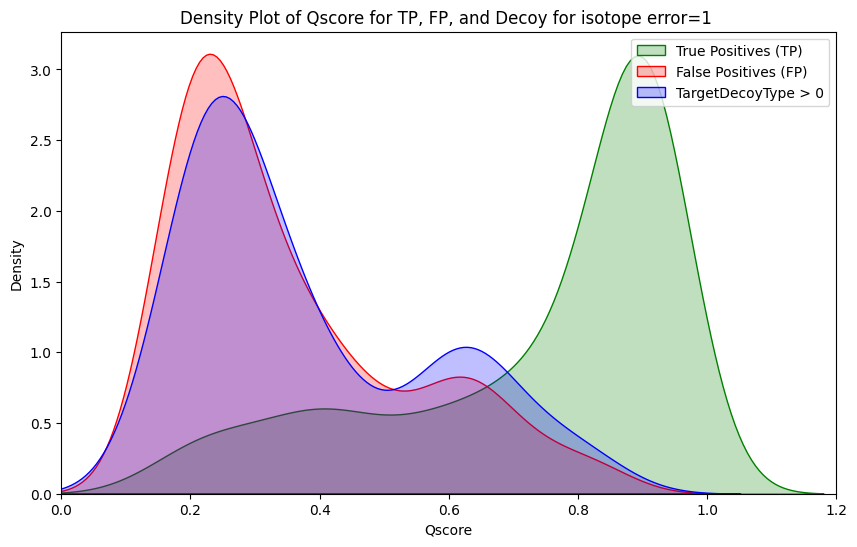

In [97]:
#distribution plots without kde fitting
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the TSV file with tab delimiter
file_a = '/content/filtered_with_tp_fpiso1 scan6.csv'  # Replace with the path to your file
df = pd.read_csv(file_a, sep='\t')

# Clean the column names by stripping extra spaces
df.columns = df.columns.str.strip()

# Verify column names to ensure Qscore and TP_FP are present
print(df.columns)

# Drop rows with missing Qscore values (if any)
df = df.dropna(subset=['Qscore'])

# Filter data for different categories
df_tp = df[df['TP_FP'] == 'TP']  # True Positives
df_fp = df[df['TP_FP'] == 'FP']  # False Positives
df_decoy = df[df['TargetDecoyType'] > 0]  # TargetDecoyType > 0

# Plot density plots using seaborn
plt.figure(figsize=(10, 6))

# Density plots with KDE
sns.kdeplot(df_tp['Qscore'], label='True Positives (TP)', color='green', fill=True)
sns.kdeplot(df_fp['Qscore'], label='False Positives (FP)', color='red', fill=True)
sns.kdeplot(df_decoy['Qscore'], label='TargetDecoyType > 0', color='blue', fill=True)

# Set x-axis limits to start from 0
plt.xlim(0, 1.2)  # Adjust the upper limit (1.2) based on your data's Qscore range

# Add labels and title
plt.xlabel('Qscore')
plt.ylabel('Density')
plt.title('Density Plot of Qscore for TP, FP, and Decoy for isotope error=1 ')
plt.legend()

# Show the plot
plt.show()


In [46]:
#For iso =1, wrong one
import pandas as pd

# Load file A (filtered.tsv) and file B (true mass CSV)
file_a = '/content/filtered_outputisotope1 Scan 10.tsv'  # Replace with the path to your file A
file_b = '/content/neutral_fragment_masses based on mass range.csv'  # Replace with the path to your file B
output_file = 'filtered_with_tp_fpiso1 scan 10.csv'

# Read the filtered.tsv into a pandas DataFrame
df_a = pd.read_csv(file_a, sep='\t')

# Read the true mass file (file B) into a pandas DataFrame
df_b = pd.read_csv(file_b)

# Filter rows in file A where TargetDecoyType = 0
df_a_filtered = df_a[df_a['TargetDecoyType'] == 0].copy()

# Add a new column 'TP_FP' to mark True Positive (TP) and False Positive (FP)
df_a_filtered['TP_FP'] = 'FP'  # Initialize all as FP

# Set the ppm tolerance
ppm_tolerance = 10

# Ensure 'MonoisotopicMass' in df_a_filtered and 'Neutral Mass' in df_b are numeric
df_a_filtered['MonoisotopicMass'] = pd.to_numeric(df_a_filtered['MonoisotopicMass'], errors='coerce')
df_b['Neutral Mass'] = pd.to_numeric(df_b['Neutral Mass'], errors='coerce')

# Drop rows with NaN MonoisotopicMass or Neutral Mass
df_a_filtered = df_a_filtered.dropna(subset=['MonoisotopicMass'])
df_b = df_b.dropna(subset=['Neutral Mass'])

# Reset index for df_a_filtered
df_a_filtered = df_a_filtered.reset_index(drop=True)

# Iterate over each row in df_a_filtered
for i, row in df_a_filtered.iterrows():
    mass_a = row['MonoisotopicMass']
    # Calculate ppm difference between mass_a and all Neutral Masses in df_b
    ppm_diff = abs(mass_a - df_b['Neutral Mass']) / df_b['Neutral Mass'] * 1e6

    # Create isotope error conditions
    isotope_error_condition = (
        (ppm_diff <= ppm_tolerance) |
        ((mass_a >= df_b['Neutral Mass'] - 0.1) &
         (mass_a <= df_b['Neutral Mass'] + 0.1)) |
        ((mass_a >= df_b['Neutral Mass'] - 1.1) &
         (mass_a <= df_b['Neutral Mass'] - 0.9)) |
        ((mass_a >= df_b['Neutral Mass'] + 0.9) &
         (mass_a <= df_b['Neutral Mass'] + 1.1))
    )

    # Check if any condition is True
    matches_within_tolerance = isotope_error_condition.any()

    # Mark as True Positive (TP) if a match is found
    if matches_within_tolerance:
        df_a_filtered.at[i, 'TP_FP'] = 'TP'

# Merge the TP/FP column back into the original df_a
df_a['TP_FP'] = 'FP'  # Initialize all as FP
df_a.loc[df_a_filtered.index, 'TP_FP'] = df_a_filtered['TP_FP']

# Save the updated DataFrame with TP/FP information back to a new TSV file
df_a.to_csv(output_file, sep='\t', index=False)

print(f"File with TP/FP column saved to {output_file}")


File with TP/FP column saved to filtered_with_tp_fpiso1 scan 10.csv


In [96]:
#corrected script for iso 1
import pandas as pd

# Load file A (filtered.tsv) and file B (true mass CSV)
file_a = '/content/FP class3_centroid_ms2_iso1.tsv'  # Replace with the path to your file A
file_b = '/content/neutral_fragment_masses based on mass range.csv'  # Replace with the path to your file B
output_file = 'filtered_with_tp_fpiso1 scan6.csv'

# Read the filtered.tsv into a pandas DataFrame
df_a = pd.read_csv(file_a, sep='\t')

# Read the true mass file (file B) into a pandas DataFrame
df_b = pd.read_csv(file_b)

# Filter rows in file A where TargetDecoyType = 0
df_a_filtered = df_a[df_a['TargetDecoyType'] == 0].copy()

# Add a new column 'TP_FP' to mark True Positive (TP) and False Positive (FP)
df_a_filtered['TP_FP'] = 'FP'  # Initialize all as FP

# Set the ppm tolerance
ppm_tolerance = 10

# Ensure 'MonoisotopicMass' in df_a_filtered and 'Neutral Mass' in df_b are numeric
df_a_filtered['MonoisotopicMass'] = pd.to_numeric(df_a_filtered['MonoisotopicMass'], errors='coerce')
df_b['Neutral Mass'] = pd.to_numeric(df_b['Neutral Mass'], errors='coerce')

# Drop rows with NaN MonoisotopicMass or Neutral Mass
df_a_filtered = df_a_filtered.dropna(subset=['MonoisotopicMass'])
df_b = df_b.dropna(subset=['Neutral Mass'])

# Reset index for df_a_filtered
df_a_filtered = df_a_filtered.reset_index(drop=True)

# Iterate over each row in df_a_filtered and compare MonoisotopicMass and ScanNum with file B
for i, row in df_a_filtered.iterrows():
    mass_a = row['MonoisotopicMass']
    scan_a = row['ScanNum']  # Assuming file A has 'ScanNum' column

    # Calculate ppm difference between mass_a and all Neutral Masses in df_b
    ppm_diff = abs(mass_a - df_b['Neutral Mass']) / df_b['Neutral Mass'] * 1e6

    # Create isotope error conditions, accounting for mass and scan number
    isotope_error_condition = (
        ((ppm_diff <= ppm_tolerance) & (scan_a == df_b['Scan Number'])) |
        ((mass_a >= df_b['Neutral Mass'] - 0.1) & (mass_a <= df_b['Neutral Mass'] + 0.1) & (scan_a == df_b['Scan Number'])) |
        ((mass_a >= df_b['Neutral Mass'] - 1.1) & (mass_a <= df_b['Neutral Mass'] - 0.9) & (scan_a == df_b['Scan Number'])) |
        ((mass_a >= df_b['Neutral Mass'] + 0.9) & (mass_a <= df_b['Neutral Mass'] + 1.1) & (scan_a == df_b['Scan Number']))
    )

    # Check if any condition is True
    matches_within_tolerance = isotope_error_condition.any()

    # Mark as True Positive (TP) if a match is found
    if matches_within_tolerance:
        df_a_filtered.at[i, 'TP_FP'] = 'TP'

# Merge the TP/FP column back into the original df_a
df_a['TP_FP'] = 'FP'  # Initialize all as FP
df_a.loc[df_a_filtered.index, 'TP_FP'] = df_a_filtered['TP_FP']

# Save the updated DataFrame with TP/FP information back to a new TSV file
df_a.to_csv(output_file, sep='\t', index=False)

print(f"File with TP/FP column saved to {output_file}")


File with TP/FP column saved to filtered_with_tp_fpiso1 scan6.csv


In [7]:
import pandas as pd
import numpy as np

# Load file A (filtered.tsv) and file B (true mass CSV)
file_a = '/content/FP class3_centroid_ms2iso1.tsv'  # Replace with the path to your file A
file_b = '/content/neutral_fragment_masses based on mass range.csv'  # Replace with the path to your file B
output_file = 'filtered_with_tp_fpthree classes.csv'

# Read the filtered.tsv into a pandas DataFrame
df_a = pd.read_csv(file_a, sep='\t')

# Read the true mass file (file B) into a pandas DataFrame
df_b = pd.read_csv(file_b)

# Filter rows in file A where TargetDecoyType = 0
df_a_filtered = df_a[df_a['TargetDecoyType'] == 0].copy()

# Add a new column 'TP_FP' to mark True Positive (TP) and False Positive (FP)
df_a_filtered['TP_FP'] = 'FP'  # Initialize all as FP

# Set the ppm tolerance
ppm_tolerance = 10

# Ensure 'MonoisotopicMass' in df_a_filtered and 'Neutral Mass' in df_b are numeric
df_a_filtered['MonoisotopicMass'] = pd.to_numeric(df_a_filtered['MonoisotopicMass'], errors='coerce')
df_b['Neutral Mass'] = pd.to_numeric(df_b['Neutral Mass'], errors='coerce')

# Drop rows with NaN MonoisotopicMass or Neutral Mass
df_a_filtered = df_a_filtered.dropna(subset=['MonoisotopicMass'])
df_b = df_b.dropna(subset=['Neutral Mass'])

# Reset index for df_a_filtered
df_a_filtered = df_a_filtered.reset_index(drop=True)

# Iterate over each row in df_a_filtered
for i, row in df_a_filtered.iterrows():
    mass_a = row['MonoisotopicMass']
    # Calculate ppm difference between mass_a and all Neutral Masses in df_b
    ppm_diff = abs(mass_a - df_b['Neutral Mass']) / df_b['Neutral Mass'] * 1e6

    # Create isotope error conditions
    isotope_error_condition = (
        (ppm_diff <= ppm_tolerance) |
        ((mass_a >= df_b['Neutral Mass'] - 0.1) &
         (mass_a <= df_b['Neutral Mass'] + 0.1)) |
        ((mass_a >= df_b['Neutral Mass'] - 1.1) &
         (mass_a <= df_b['Neutral Mass'] - 0.9)) |
        ((mass_a >= df_b['Neutral Mass'] + 0.9) &
         (mass_a <= df_b['Neutral Mass'] + 1.1))
    )

    # Check if any condition is True
    matches_within_tolerance = isotope_error_condition.any()

    # Mark as True Positive (TP) if a match is found
    if matches_within_tolerance:
        df_a_filtered.at[i, 'TP_FP'] = 'TP'

# Now, classify FPs into Deisotoping FP, Decharging FP, Noise FP
# First, identify all TPs
df_TP = df_a_filtered[df_a_filtered['TP_FP'] == 'TP']
df_FP = df_a_filtered[df_a_filtered['TP_FP'] == 'FP'].copy()

# Initialize FP_Type column
df_FP['FP_Type'] = 'Noise FP'  # Default classification

# For Deisotoping FPs (same as before)
mass_tolerance_da = 0.1  # Tolerance for mass difference
isotope_mass_diffs = [1, 2, 3]  # ±1 and ±2 Da

# Classify Deisotoping FPs
for i, fp_row in df_FP.iterrows():
    scan_number_fp = fp_row['ScanNum']  # Replace with 'ScanNum' if that's the correct column name
    mass_fp = fp_row['MonoisotopicMass']

    # Find TPs with the same ScanNum
    df_TP_same_scan = df_TP[df_TP['ScanNum'] == scan_number_fp]

    deisotoping_fp_found = False
    for _, tp_row in df_TP_same_scan.iterrows():
        mass_tp = tp_row['MonoisotopicMass']
        for mass_diff in isotope_mass_diffs:
            # Check for mass difference of ±mass_diff Da within tolerance
            if abs(mass_fp - mass_tp - mass_diff) <= mass_tolerance_da or abs(mass_fp - mass_tp + mass_diff) <= mass_tolerance_da:
                # Found a Deisotoping FP
                df_FP.at[i, 'FP_Type'] = 'Deisotoping FP'
                deisotoping_fp_found = True
                break
        if deisotoping_fp_found:
            break

# Now, classify remaining FPs as Decharging FPs using MinCharge and MaxCharge
# Proton mass constant
proton_mass = 1.00728

# Ensure 'MinCharge' and 'MaxCharge' columns are numeric
df_FP['MinCharge'] = pd.to_numeric(df_FP['MinCharge'], errors='coerce')
df_FP['MaxCharge'] = pd.to_numeric(df_FP['MaxCharge'], errors='coerce')
df_TP['MinCharge'] = pd.to_numeric(df_TP['MinCharge'], errors='coerce')
df_TP['MaxCharge'] = pd.to_numeric(df_TP['MaxCharge'], errors='coerce')

# Drop rows with NaN charges
df_FP = df_FP.dropna(subset=['MinCharge', 'MaxCharge'])
df_TP = df_TP.dropna(subset=['MinCharge', 'MaxCharge'])

# Classify Decharging FPs
for i, fp_row in df_FP[df_FP['FP_Type'] == 'Noise FP'].iterrows():
    scan_number_fp = fp_row['ScanNum']
    mass_fp = fp_row['MonoisotopicMass']
    min_charge_fp = int(fp_row['MinCharge'])
    max_charge_fp = int(fp_row['MaxCharge'])

    # Generate possible charges for FP
    charges_fp = list(range(min_charge_fp, max_charge_fp + 1))

    # Find TPs with the same ScanNum
    df_TP_same_scan = df_TP[df_TP['ScanNum'] == scan_number_fp]

    decharging_fp_found = False
    for _, tp_row in df_TP_same_scan.iterrows():
        mass_tp = tp_row['MonoisotopicMass']
        min_charge_tp = int(tp_row['MinCharge'])
        max_charge_tp = int(tp_row['MaxCharge'])

        # Generate possible charges for TP
        charges_tp = list(range(min_charge_tp, max_charge_tp + 1))

        # Compare all combinations of charge states
        for z_fp in charges_fp:
            for z_tp in charges_tp:
                if z_fp == z_tp:
                    continue  # Skip same charge states

                # Calculate theoretical m/z values
                mz_fp = (mass_fp + z_fp * proton_mass) / z_fp
                mz_tp = (mass_tp + z_tp * proton_mass) / z_tp

                # Check if m/z difference is within tolerance
                if abs(mz_fp - mz_tp) <= mass_tolerance_da:
                    # Found a Decharging FP
                    df_FP.at[i, 'FP_Type'] = 'Decharging FP'
                    decharging_fp_found = True
                    break
            if decharging_fp_found:
                break
        if decharging_fp_found:
            break

# Merge FP_Type back into df_a_filtered
df_a_filtered['FP_Type'] = 'N/A'  # Initialize
df_a_filtered.loc[df_FP.index, 'FP_Type'] = df_FP['FP_Type']

# Merge TP_FP and FP_Type back into original df_a
df_a['TP_FP'] = 'FP'  # Initialize all as FP
df_a.loc[df_a_filtered.index, 'TP_FP'] = df_a_filtered['TP_FP']
df_a['FP_Type'] = 'N/A'  # Initialize
df_a.loc[df_a_filtered.index, 'FP_Type'] = df_a_filtered['FP_Type']

# Save the updated DataFrame with TP/FP and FP_Type information back to a new TSV file
df_a.to_csv(output_file, sep='\t', index=False)

print(f"File with TP/FP and FP_Type columns saved to {output_file}")


<ipython-input-7-2c5820c6cd6e>:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TP['MinCharge'] = pd.to_numeric(df_TP['MinCharge'], errors='coerce')
<ipython-input-7-2c5820c6cd6e>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TP['MaxCharge'] = pd.to_numeric(df_TP['MaxCharge'], errors='coerce')


File with TP/FP and FP_Type columns saved to filtered_with_tp_fpthree classes.csv


Index(['Index', 'FileName', 'ScanNum', 'FeatureIndex', 'TargetDecoyType',
       'RetentionTime', 'MassCountInSpec', 'AverageMass', 'MonoisotopicMass',
       'SumIntensity', 'MinCharge', 'MaxCharge', 'PeakCount',
       'PrecursorScanNum', 'PrecursorFeatureIndex', 'PrecursorMz',
       'PrecursorIntensity', 'PrecursorCharge', 'PrecursorSNR',
       'PrecursorMonoisotopicMass', 'PrecursorQscore', 'PrecursorQscore2D',
       'PrecursorQvalue', 'IsotopeCosine', 'ChargeCosine', 'ChargeScore',
       'MassSNR', 'ChargeSNR', 'AveragePPMError', 'RepresentativeCharge',
       'RepresentativeMzStart', 'RepresentativeMzEnd', 'Qscore', 'Qscore2D',
       'Qvalue', 'Unnamed: 35', 'TP_FP', 'FP_Type'],
      dtype='object')


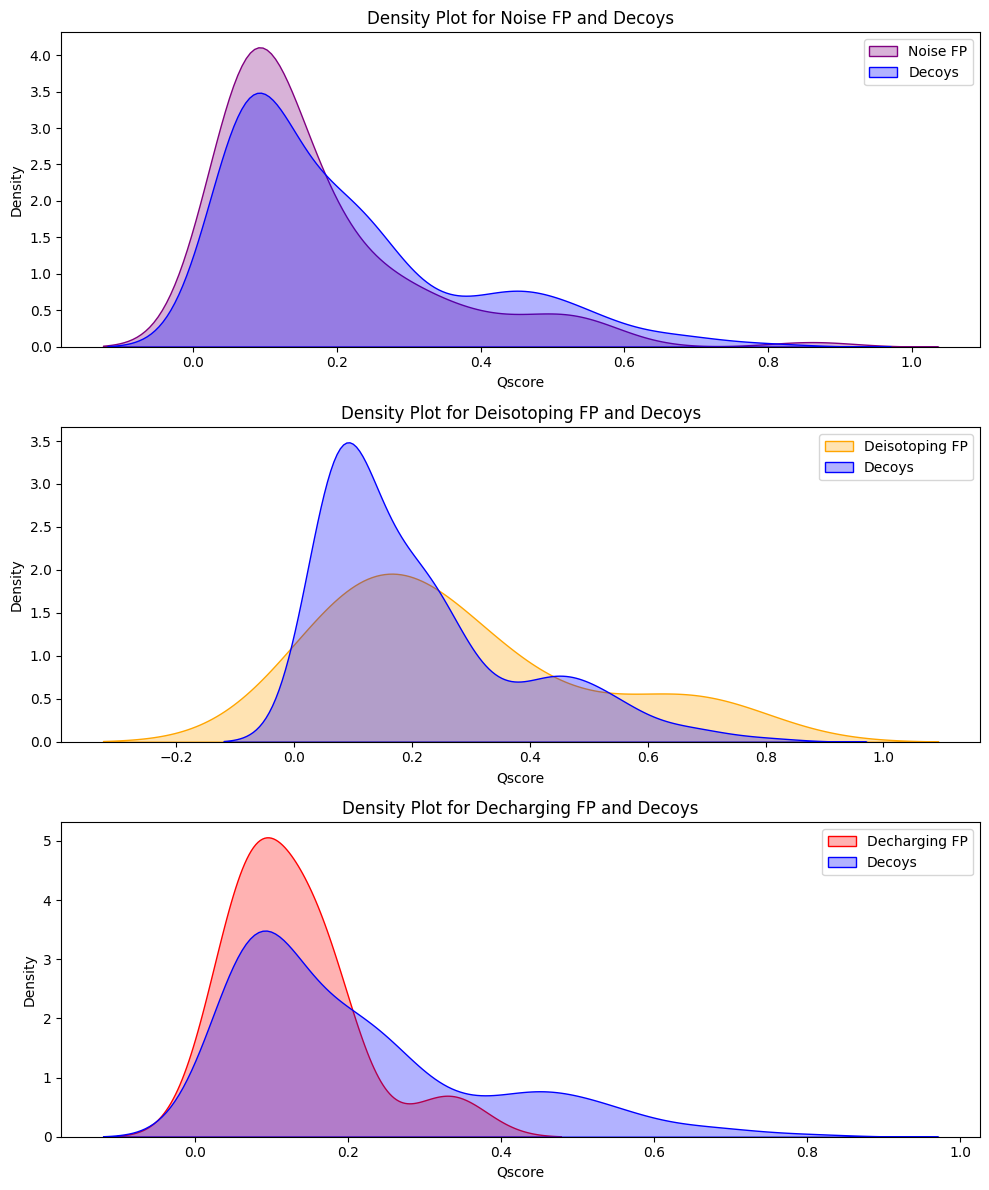

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the TSV file with tab delimiter
file_a = '/content/filtered_with_tp_fpthree classes.csv'  # Replace with the path to your file
df = pd.read_csv(file_a, sep='\t')

# Clean the column names by stripping extra spaces
df.columns = df.columns.str.strip()

# Verify column names to ensure Qscore, TP_FP, and FP_Type are present
print(df.columns)

# Drop rows with missing Qscore values (if any)
df = df.dropna(subset=['Qscore'])

# Filter data for decoys and FP classes
df_decoy = df[df['TargetDecoyType'] > 0]  # TargetDecoyType > 0
df_fp = df[df['TP_FP'] == 'FP']  # False Positives

# Separate FP classes
noise_fp = df_fp[df_fp['FP_Type'] == 'Noise FP']
deisotoping_fp = df_fp[df_fp['FP_Type'] == 'Deisotoping FP']
decharging_fp = df_fp[df_fp['FP_Type'] == 'Decharging FP']

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Plot density plot for Noise FP
sns.kdeplot(noise_fp['Qscore'], label='Noise FP', color='purple', fill=True, alpha=0.3, ax=axs[0])
sns.kdeplot(df_decoy['Qscore'], label='Decoys', color='blue', fill=True, alpha=0.3, ax=axs[0])
axs[0].set_title('Density Plot for Noise FP and Decoys')
axs[0].set_xlabel('Qscore')
axs[0].set_ylabel('Density')
axs[0].legend()

# Plot density plot for Deisotoping FP
sns.kdeplot(deisotoping_fp['Qscore'], label='Deisotoping FP', color='orange', fill=True, alpha=0.3, ax=axs[1])
sns.kdeplot(df_decoy['Qscore'], label='Decoys', color='blue', fill=True, alpha=0.3, ax=axs[1])
axs[1].set_title('Density Plot for Deisotoping FP and Decoys')
axs[1].set_xlabel('Qscore')
axs[1].set_ylabel('Density')
axs[1].legend()

# Plot density plot for Decharging FP
sns.kdeplot(decharging_fp['Qscore'], label='Decharging FP', color='red', fill=True, alpha=0.3, ax=axs[2])
sns.kdeplot(df_decoy['Qscore'], label='Decoys', color='blue', fill=True, alpha=0.3, ax=axs[2])
axs[2].set_title('Density Plot for Decharging FP and Decoys')
axs[2].set_xlabel('Qscore')
axs[2].set_ylabel('Density')
axs[2].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


Index(['Index', 'FileName', 'ScanNum', 'FeatureIndex', 'TargetDecoyType',
       'RetentionTime', 'MassCountInSpec', 'AverageMass', 'MonoisotopicMass',
       'SumIntensity', 'MinCharge', 'MaxCharge', 'PeakCount',
       'PrecursorScanNum', 'PrecursorFeatureIndex', 'PrecursorMz',
       'PrecursorIntensity', 'PrecursorCharge', 'PrecursorSNR',
       'PrecursorMonoisotopicMass', 'PrecursorQscore', 'PrecursorQscore2D',
       'PrecursorQvalue', 'IsotopeCosine', 'ChargeCosine', 'ChargeScore',
       'MassSNR', 'ChargeSNR', 'AveragePPMError', 'RepresentativeCharge',
       'RepresentativeMzStart', 'RepresentativeMzEnd', 'Qscore', 'Qscore2D',
       'Qvalue', 'Unnamed: 35', 'TP_FP', 'FP_Type'],
      dtype='object')


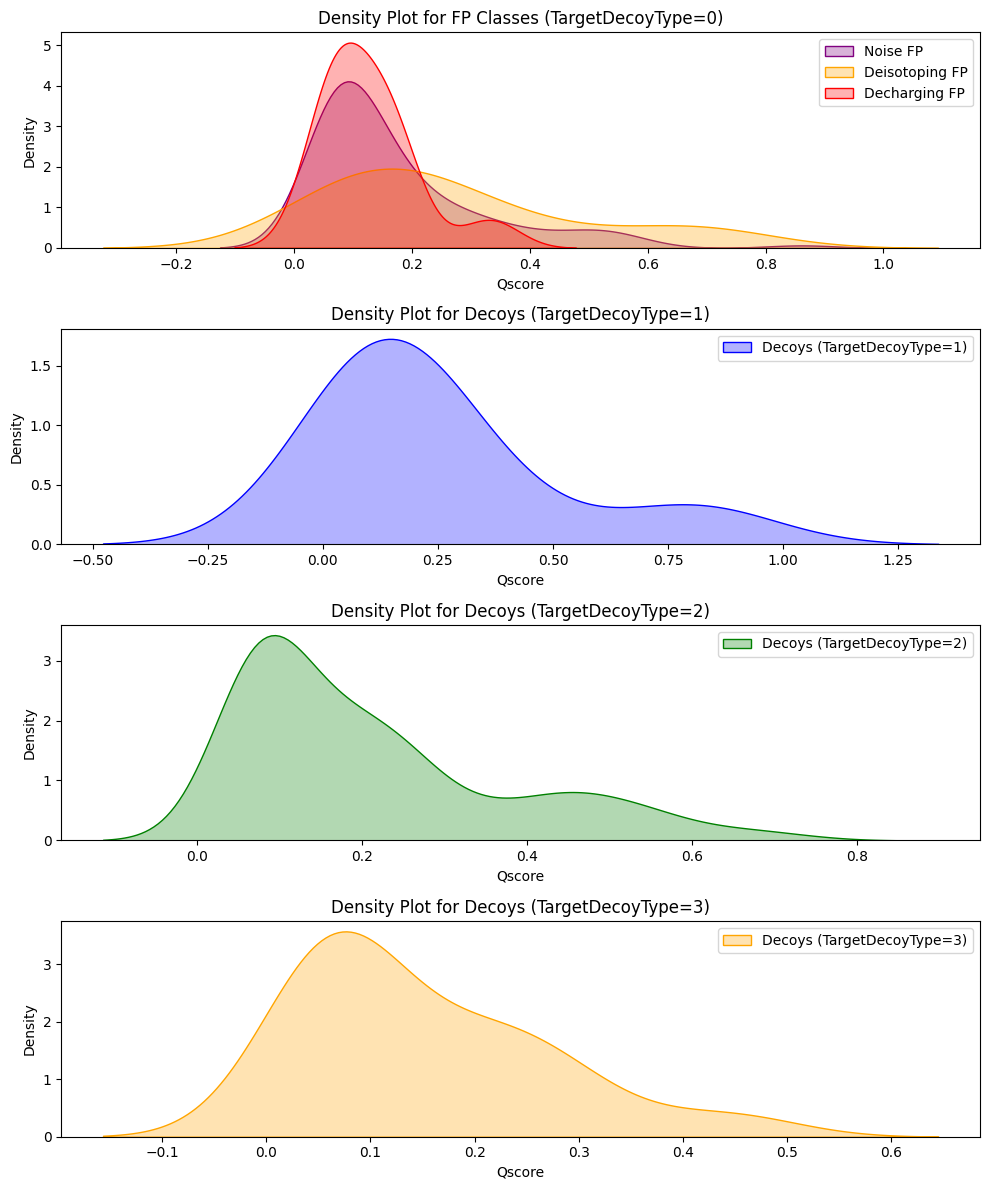

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the TSV file with tab delimiter
file_a = '/content/filtered_with_tp_fpthree classes.csv'  # Replace with the path to your file
df = pd.read_csv(file_a, sep='\t')

# Clean the column names by stripping extra spaces
df.columns = df.columns.str.strip()

# Verify column names to ensure Qscore, TP_FP, FP_Type, and TargetDecoyType are present
print(df.columns)

# Drop rows with missing Qscore values (if any)
df = df.dropna(subset=['Qscore'])

# Filter data for different decoy types
decoy_type1 = df[df['TargetDecoyType'] == 1]  # Decoys (TargetDecoyType=1)
decoy_type2 = df[df['TargetDecoyType'] == 2]  # Decoys (TargetDecoyType=2)
decoy_type3 = df[df['TargetDecoyType'] == 3]  # Decoys (TargetDecoyType=3)

# Filter for FP (TargetDecoyType=0) and its FP classes (Noise FP, Deisotoping FP, Decharging FP)
df_fp = df[df['TargetDecoyType'] == 0]  # False Positives

# Classify FP based on FP_Type
noise_fp = df_fp[df_fp['FP_Type'] == 'Noise FP']
deisotoping_fp = df_fp[df_fp['FP_Type'] == 'Deisotoping FP']
decharging_fp = df_fp[df_fp['FP_Type'] == 'Decharging FP']

# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 12))

# Plot density plot for FP classes (TargetDecoyType=0)
sns.kdeplot(noise_fp['Qscore'], label='Noise FP', color='purple', fill=True, alpha=0.3, ax=axs[0])
sns.kdeplot(deisotoping_fp['Qscore'], label='Deisotoping FP', color='orange', fill=True, alpha=0.3, ax=axs[0])
sns.kdeplot(decharging_fp['Qscore'], label='Decharging FP', color='red', fill=True, alpha=0.3, ax=axs[0])
axs[0].set_title('Density Plot for FP Classes (TargetDecoyType=0)')
axs[0].set_xlabel('Qscore')
axs[0].set_ylabel('Density')
axs[0].legend()

# Plot density plot for Decoys (TargetDecoyType=1)
sns.kdeplot(decoy_type1['Qscore'], label='Decoys (TargetDecoyType=1)', color='blue', fill=True, alpha=0.3, ax=axs[1])
axs[1].set_title('Density Plot for Decoys (TargetDecoyType=1)')
axs[1].set_xlabel('Qscore')
axs[1].set_ylabel('Density')
axs[1].legend()

# Plot density plot for Decoys (TargetDecoyType=2)
sns.kdeplot(decoy_type2['Qscore'], label='Decoys (TargetDecoyType=2)', color='green', fill=True, alpha=0.3, ax=axs[2])
axs[2].set_title('Density Plot for Decoys (TargetDecoyType=2)')
axs[2].set_xlabel('Qscore')
axs[2].set_ylabel('Density')
axs[2].legend()

# Plot density plot for Decoys (TargetDecoyType=3)
sns.kdeplot(decoy_type3['Qscore'], label='Decoys (TargetDecoyType=3)', color='orange', fill=True, alpha=0.3, ax=axs[3])
axs[3].set_title('Density Plot for Decoys (TargetDecoyType=3)')
axs[3].set_xlabel('Qscore')
axs[3].set_ylabel('Density')
axs[3].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [99]:
import pandas as pd

# Load the file into a pandas DataFrame (replace the file path with your actual file path)
file_path = '/content/FP class3_centroid_ms2_iso1.tsv'  # Update this to the path of your file
df = pd.read_csv(file_path, sep='\t')  # If your file is a CSV, change sep='\t' to ','

# Group the data by ScanNum and count the number of masses for each ScanNum
mass_count_per_scan = df.groupby('ScanNum')['MonoisotopicMass'].count()

# Print the number of masses for each ScanNum
for scan_num, count in mass_count_per_scan.items():
    print(f"ScanNum: {scan_num}, Number of Masses: {count}")


ScanNum: 6, Number of Masses: 61
ScanNum: 7, Number of Masses: 168
ScanNum: 8, Number of Masses: 105
ScanNum: 9, Number of Masses: 120
ScanNum: 10, Number of Masses: 176


Index(['Index', 'FileName', 'ScanNum', 'FeatureIndex', 'TargetDecoyType',
       'RetentionTime', 'MassCountInSpec', 'AverageMass', 'MonoisotopicMass',
       'SumIntensity', 'MinCharge', 'MaxCharge', 'PeakCount',
       'PrecursorScanNum', 'PrecursorFeatureIndex', 'PrecursorMz',
       'PrecursorIntensity', 'PrecursorCharge', 'PrecursorSNR',
       'PrecursorMonoisotopicMass', 'PrecursorQscore', 'PrecursorQscore2D',
       'PrecursorQvalue', 'IsotopeCosine', 'ChargeCosine', 'ChargeScore',
       'MassSNR', 'ChargeSNR', 'AveragePPMError', 'RepresentativeCharge',
       'RepresentativeMzStart', 'RepresentativeMzEnd', 'Qscore', 'Qscore2D',
       'Qvalue', 'Unnamed: 35', 'TP_FP', 'FP_Type'],
      dtype='object')


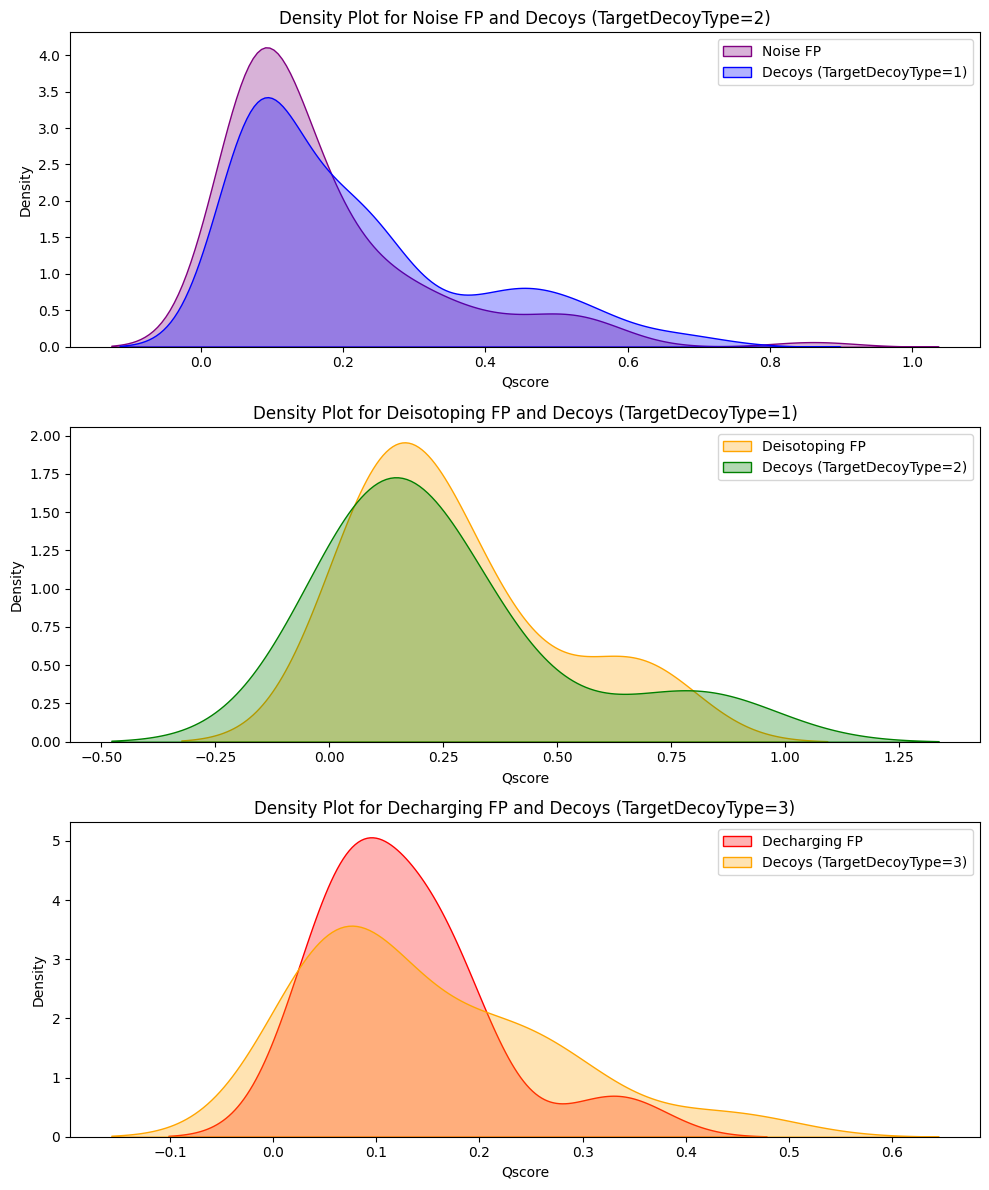

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the TSV file with tab delimiter
file_a = '/content/filtered_with_tp_fpthree classes.csv'  # Replace with the path to your file
df = pd.read_csv(file_a, sep='\t')

# Clean the column names by stripping extra spaces
df.columns = df.columns.str.strip()

# Verify column names to ensure Qscore, TP_FP, FP_Type, and TargetDecoyType are present
print(df.columns)

# Drop rows with missing Qscore values (if any)
df = df.dropna(subset=['Qscore'])

# Filter for FP (TargetDecoyType=0) and classify based on FP_Type
noise_fp = df[(df['FP_Type'] == 'Noise FP') & (df['TargetDecoyType'] == 0)]
deisotoping_fp = df[(df['FP_Type'] == 'Deisotoping FP') & (df['TargetDecoyType'] == 0)]
decharging_fp = df[(df['FP_Type'] == 'Decharging FP') & (df['TargetDecoyType'] == 0)]

# Separate Decoys based on TargetDecoyType
decoy_type1 = df[df['TargetDecoyType'] == 1]
decoy_type2 = df[df['TargetDecoyType'] == 2]
decoy_type3 = df[df['TargetDecoyType'] == 3]

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Plot density plot for Noise FP and Decoys (TargetDecoyType=1)
sns.kdeplot(noise_fp['Qscore'], label='Noise FP', color='purple', fill=True, alpha=0.3, ax=axs[0])
sns.kdeplot(decoy_type2['Qscore'], label='Decoys (TargetDecoyType=1)', color='blue', fill=True, alpha=0.3, ax=axs[0])
axs[0].set_title('Density Plot for Noise FP and Decoys (TargetDecoyType=2)')
axs[0].set_xlabel('Qscore')
axs[0].set_ylabel('Density')
axs[0].legend()

# Plot density plot for Deisotoping FP and Decoys (TargetDecoyType=2)
sns.kdeplot(deisotoping_fp['Qscore'], label='Deisotoping FP', color='orange', fill=True, alpha=0.3, ax=axs[1])
sns.kdeplot(decoy_type1['Qscore'], label='Decoys (TargetDecoyType=2)', color='green', fill=True, alpha=0.3, ax=axs[1])
axs[1].set_title('Density Plot for Deisotoping FP and Decoys (TargetDecoyType=1)')
axs[1].set_xlabel('Qscore')
axs[1].set_ylabel('Density')
axs[1].legend()

# Plot density plot for Decharging FP and Decoys (TargetDecoyType=3)
sns.kdeplot(decharging_fp['Qscore'], label='Decharging FP', color='red', fill=True, alpha=0.3, ax=axs[2])
sns.kdeplot(decoy_type3['Qscore'], label='Decoys (TargetDecoyType=3)', color='orange', fill=True, alpha=0.3, ax=axs[2])
axs[2].set_title('Density Plot for Decharging FP and Decoys (TargetDecoyType=3)')
axs[2].set_xlabel('Qscore')
axs[2].set_ylabel('Density')
axs[2].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()
